
# IDS Assignment Part 1

This is the first part of the assignment in IDS 2023/2024.

Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading.
Provide your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. **Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting!** Additionally, please ensure that the code notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. **Ensure that all your claims are supported.**

Hint 2: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

**Student names and matriculation numbers**

1.)

2.)

3.)

# Table of Contents

**Re-Drive - A platform for selling your used car**

**Q1: Preprocessing the data set**

**Q2: Exploring the data set**
- **(a) Exploration of the target feature**
- **(b) Exploration of correlations**
    - (i) Correleation with numerical attributes
    - (ii) Univariate correlations with categorical attributes
    - (iii) Multivariate correlations with categorical attributes

**Q3: Predicting prices**
- **(a) Baseline**
- **(b) Prediction by classification**
    - (i) Price binning
    - (ii) Data transformation for decision trees
    - (iii) Model training
    - (iv) Price prediction
- **(c) Prediction by clustering**
    - (i) Data transformation for clustering
    - (ii) Computing the distance matrix
    - (iii) Applying DBSCAN
    - (iv) Price prediction
- **(d) Prediction by regression and with neural networks**
    - (i) Feature engineering
    - (ii) Feature selection
    - (iii) Data transformation for regression and neural networks
    - (iv) Model training function
    - (v) Linear regression
    - (vi) Regression with non-linear kernels
    - (vii) Neural networks
- **(e) Discussion**


**Q4: Predicting time-to-sale**
- **(a) Data preparation**
    - (i) Target feature creation
    - (ii) Sensitivity and specificity
    - (iii) Data transformation for classification problem
- **(b) Classifiers**
    - (i) Model training
    - (ii) Evaluation Part 1
    - (iii) Evaluation Part 2
- **(c) Discussion**


# ReDrive - A platform for selling your used car

You finally made it! After years of hard study, you finally obtained a degree in data science. Congratulations!

Having a passion for automotive technologies, you decided to combine that passion with your profound knowledge in data science. Together with your colleague N., who has a passion for sustainability, you founded **ReDrive** in the beginning of 2023, an online platform where people can sell their used cars.

The first months of your joint venture are going very well, and you are making good revenue. It is time now for you to apply your data science expertise to evaluate your business and to look for improvement potential. Your idea on that is to first explore the data, and then to see if you can create useful models for predicting car prices.

The dataset *used_cars.csv* contains information about cars that customers have sold or are trying to sell via ReDrive in 2023.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: Preprocessing the data set **[8 points]**

Using the file *used_cars.csv*, create a dataframe. **[1 point]**

In [2]:
df = pd.read_csv("used_cars.csv")

Provide the names of all columns that contain NaN values. **[1 point]**

In [3]:
nan_values = df.isna().any()
print(nan_values)

brand           False
model           False
model_year      False
milage          False
fuel_type        True
engine          False
transmission    False
ext_col         False
int_col         False
accident         True
clean_title      True
price           False
dtype: bool


**Answer:** 

*The columns that contain NaN values are fuel_type, accident and clean_title.*

Display all rows containing NaN values. **[1 point]**

In [4]:
df[df.isna().any(axis=1)]

brand                                         model  model_year  \
2       Lexus                                 RX 350 RX 350        2022   
4        Audi                     Q3 45 S line Premium Plus        2021   
5       Acura                                      ILX 2.4L        2016   
9       Tesla                       Model X Long Range Plus        2020   
10       Land  Rover Range Rover Sport 3.0 Supercharged HST        2021   
...       ...                                           ...         ...   
3962   Toyota                               4Runner TRD Pro        2021   
3991  Porsche                                 Cayenne Turbo        2020   
3993  Porsche                                 911 Carrera S        2021   
3996    Aston                    Martin DB7 Vantage Volante        2003   
4006  Porsche                                        Taycan        2022   

           milage fuel_type  \
2      22,372 mi.  Gasoline   
4       9,835 mi.  Gasoline   
5     136,397 mi.  Gasoline   
9      34,000 mi.       NaN   
10     27,608 mi.  Gasoline   
...           ...       ...   
3962   35,048 mi.  Gasoline   
3991   39,611 mi.  Gasoline   
3993    7,008 mi.  Gasoline   
3996   14,900 mi.  Gasoline   
4006    2,116 mi.       NaN   

                                                 engine       transmission  \
2                                        3.5 Liter DOHC          Automatic   
4                            2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   
5                                             2.4 Liter                  F   
9           534.0HP Electric Motor Electric Fuel System                A/T   
10                                                   V6          Automatic   
...                                                 ...                ...   
3962                              4.0L V6 24V MPFI DOHC  5-Speed Automatic   
3991                    4.0L V8 32V GDI DOHC Twin Turbo  8-Speed Automatic   
3993  443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel        8-Speed A/T   
3996      420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel        6-Speed M/T   
4006                                           Electric          Automatic   

                      ext_col           int_col       accident clean_title  \
2                        Blue             Black  None reported         NaN   
4      Glacier White Metallic             Black  None reported         NaN   
5                      Silver            Ebony.  None reported         NaN   
9                       Black             Black  None reported         Yes   
10                 Fuji White   Pimento / Ebony  None reported         NaN   
...                       ...               ...            ...         ...   
3962               Lunar Rock  Black / Graphite  None reported         NaN   
3991  Quartzite Grey Metallic             Black  None reported         NaN   
3993                     Gray             Black            NaN         NaN   
3996                    White             Beige            NaN         NaN   
4006                    Black             Black  None reported         NaN   

         price  
2      $54,598  
4      $34,999  
5      $14,798  
9      $69,950  
10     $73,897  
...        ...  
3962   $52,590  
3991   $89,900  
3993  $151,900  
3996   $32,850  
4006   $90,998  

[740 rows x 12 columns]

You investigate the NaN values further. You decide to map the NaN values from the clean_title column to "No". Also, you map the NaN values of the accident column to "Unknown". **[1 point]**

In [5]:
df['clean_title'] = df['clean_title'].fillna("No")
df["accident"] = df["accident"].fillna("Unknown")
df

brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006            NaN                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title     price  
0     At least 1 accident or damage reported         Yes   $10,300  
1     At least 1 accident or damage reported         Yes   $38,005  
2                              None reported          No   $54,598  
3                              None reported         Yes   $15,500  
4                              None reported          No   $34,999  
...                                      ...         ...       ...  
4004                           None reported         Yes  $349,950  
4005                           None reported         Yes   $53,900  
4006                           None reported          No   $90,998  
4007                           None reported         Yes   $62,999  
4008  At least 1 accident or damage reported         Yes   $40,000  

[4009 rows x 12 columns]

Finally, you investigate the NaN values of the fuel_type column. To do so, you inspect the unique values of that column. What is your observation? Which general type of engine is accociated with NaN values in the fuel_type column? **[1 point]**

In [6]:
fuel_type_with_nan= df[df['fuel_type'].isna()]
fuel_type_with_nan.iloc[:, [4, 5]]

fuel_type                                       engine
9          NaN  534.0HP Electric Motor Electric Fuel System
44         NaN  536.0HP Electric Motor Electric Fuel System
68         NaN  536.0HP Electric Motor Electric Fuel System
92         NaN  835.0HP Electric Motor Electric Fuel System
122        NaN  835.0HP Electric Motor Electric Fuel System
...        ...                                          ...
3908       NaN                                     Electric
3913       NaN  518.0HP Electric Motor Electric Fuel System
3932       NaN  778.0HP Electric Motor Electric Fuel System
3961       NaN                                     Electric
4006       NaN                                     Electric

[170 rows x 2 columns]

**Answer:** 

*The lack of Fuel_type column is directly related to the type of engine, Electric engine is accociated with NaN values in the fuel_type column*

Based on your former findings, you decide to map the NaN values of the column fuel_type to a value. Choose a suitable value. **[1 point]**

In [7]:
df["fuel_type"] = df["fuel_type"].fillna("Electric")
df

brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006       Electric                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title     price  
0     At least 1 accident or damage reported         Yes   $10,300  
1     At least 1 accident or damage reported         Yes   $38,005  
2                              None reported          No   $54,598  
3                              None reported         Yes   $15,500  
4                              None reported          No   $34,999  
...                                      ...         ...       ...  
4004                           None reported         Yes  $349,950  
4005                           None reported         Yes   $53,900  
4006                           None reported          No   $90,998  
4007                           None reported         Yes   $62,999  
4008  At least 1 accident or damage reported         Yes   $40,000  

[4009 rows x 12 columns]

You investigate the other values of the fuel_type column. You decide to remove entries that either have *'–'* or *'not supported'* as values. **[1 point]**

In [8]:
df = df[df['fuel_type'] != '–']
df = df[df['fuel_type'] != 'not supported']
df

brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

          fuel_type                                             engine  \
0     E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1          Gasoline                               3.8L V6 24V GDI DOHC   
2          Gasoline                                     3.5 Liter DOHC   
3            Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4          Gasoline                         2.0L I4 16V GDI DOHC Turbo   
...             ...                                                ...   
4004       Gasoline                   6.0L W12 48V PDI DOHC Twin Turbo   
4005       Gasoline      349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
4006       Electric                                           Electric   
4007       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
4008       Gasoline       248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                           transmission                 ext_col  int_col  \
0                           6-Speed A/T                   Black    Black   
1                     8-Speed Automatic         Moonlight Cloud     Gray   
2                             Automatic                    Blue    Black   
3                           7-Speed A/T                   Black    Black   
4                     8-Speed Automatic  Glacier White Metallic    Black   
...                                 ...                     ...      ...   
4004  8-Speed Automatic with Auto-Shift                   C / C  Hotspur   
4005     Transmission w/Dual Shift Mode                   Black    Black   
4006                          Automatic                   Black    Black   
4007                                A/T                    Blue    Black   
4008                                A/T                    Gray    Brown   

                                    accident clean_title     price  
0     At least 1 accident or damage reported         Yes   $10,300  
1     At least 1 accident or damage reported         Yes   $38,005  
2                              None reported          No   $54,598  
3                              None reported         Yes   $15,500  
4                              None reported          No   $34,999  
...                                      ...         ...       ...  
4004                           None reported         Yes  $349,950  
4005                           None reported         Yes   $53,900  
4006                           None reported          No   $90,998  
4007                           None reported         Yes   $62,999  
4008  At least 1 accident or damage reported         Yes   $40,000  

[3962 rows x 12 columns]

How many rows does your final dataframe have? Are there any NaN values left in the columns? **[1 point]**

In [9]:
print(f'rows_number={df.shape[0]}')

nan_values = df.isna().any()
print(nan_values)

rows_number=3962
brand           False
model           False
model_year      False
milage          False
fuel_type       False
engine          False
transmission    False
ext_col         False
int_col         False
accident        False
clean_title     False
price           False
dtype: bool


**Answer:** 

*The final dataframe have 3962 rows. There are none NaN values left in the columns*

# Q2: Exploring the dataset **[14 points]**

From now on, use the dataset `used_cars_preprocessed.csv`.

In [10]:
df = pd.read_csv("used_cars_preprocessed.csv")

In the following, you want to explore the dataset. 

## (a) Exploration of the target feature **[4 points]**

You are interested in automatically determining the price of a sold car. To do so, you apply your data science knowledge on predictions. You first create a boxplot concerning the price to get an initial impression of the distribution of this attribute. The boxplot should also show the mean. Are there outliers? What can you say about the spread prices? In addition, provide the average price, first and third quartile, and the standard deviation. 

**[3 points]**

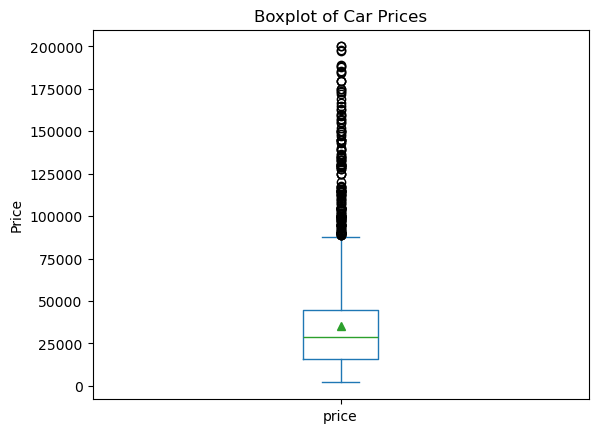

mean_price=35113.58227131124
q1_price=16000.0
q3_price=44998.5
std_dev_price=27683.727120951815


In [11]:
df['price'].plot(kind='box', showmeans=True)

plt.title('Boxplot of Car Prices')
plt.ylabel('Price')
plt.show()

mean_price = df['price'].mean()
q1_price = df['price'].quantile(0.25)
q3_price = df['price'].quantile(0.75)
std_dev_price = df['price'].std()

print(f'mean_price={mean_price}')
print(f'q1_price={q1_price}')
print(f'q3_price={q3_price}')
print(f'std_dev_price={std_dev_price}')

**Answer:** 

*The green triangle on the graph shows the average. There are values that fall above the end of the whiskers, they are plotted as balck dots. These points are outliers. The spread in prices is significant because the data have a large standard deviation relative to the mean. The average price is equal to 35113.58227131124, first and third quartile is equal to 16000 and 44998.5, and the standard deviation is equal to 27683.727120951815.*

To get deeper insight into the price distribution, you decide to create a histogram. Choose an appropriate number of bins to get an informative plot. What do you observe? 

**[1 point]**

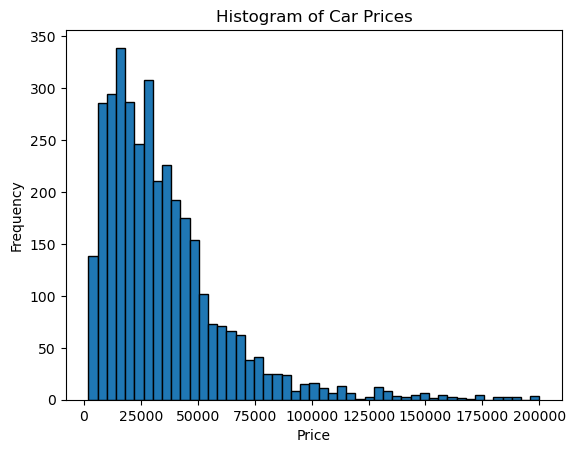

In [12]:
bin_width = 4000
n_bins = int((df['price'].max() - df['price'].min()) / bin_width)
histogram = plt.hist(df['price'], bins=n_bins, edgecolor='black')


plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Answer:** 

*The distribution is right-skewed because it’s longer on the right side of its peak. There is a long tail on the right. Most cars are concentrated in the lower price range.*

## (b) Exploration of correlations **[10 points]**

Next, you want to investigate possible correlations of other variables with the target feature.

### (i) Correleation with numerical attributes

To do so, you create a correlation matrix of the numeric values of dataset. Intepret the correlation values you found between price and *model_year*, *milage*, *horsepower*, *litres*, and *cylinders*. 

**[3 points]**

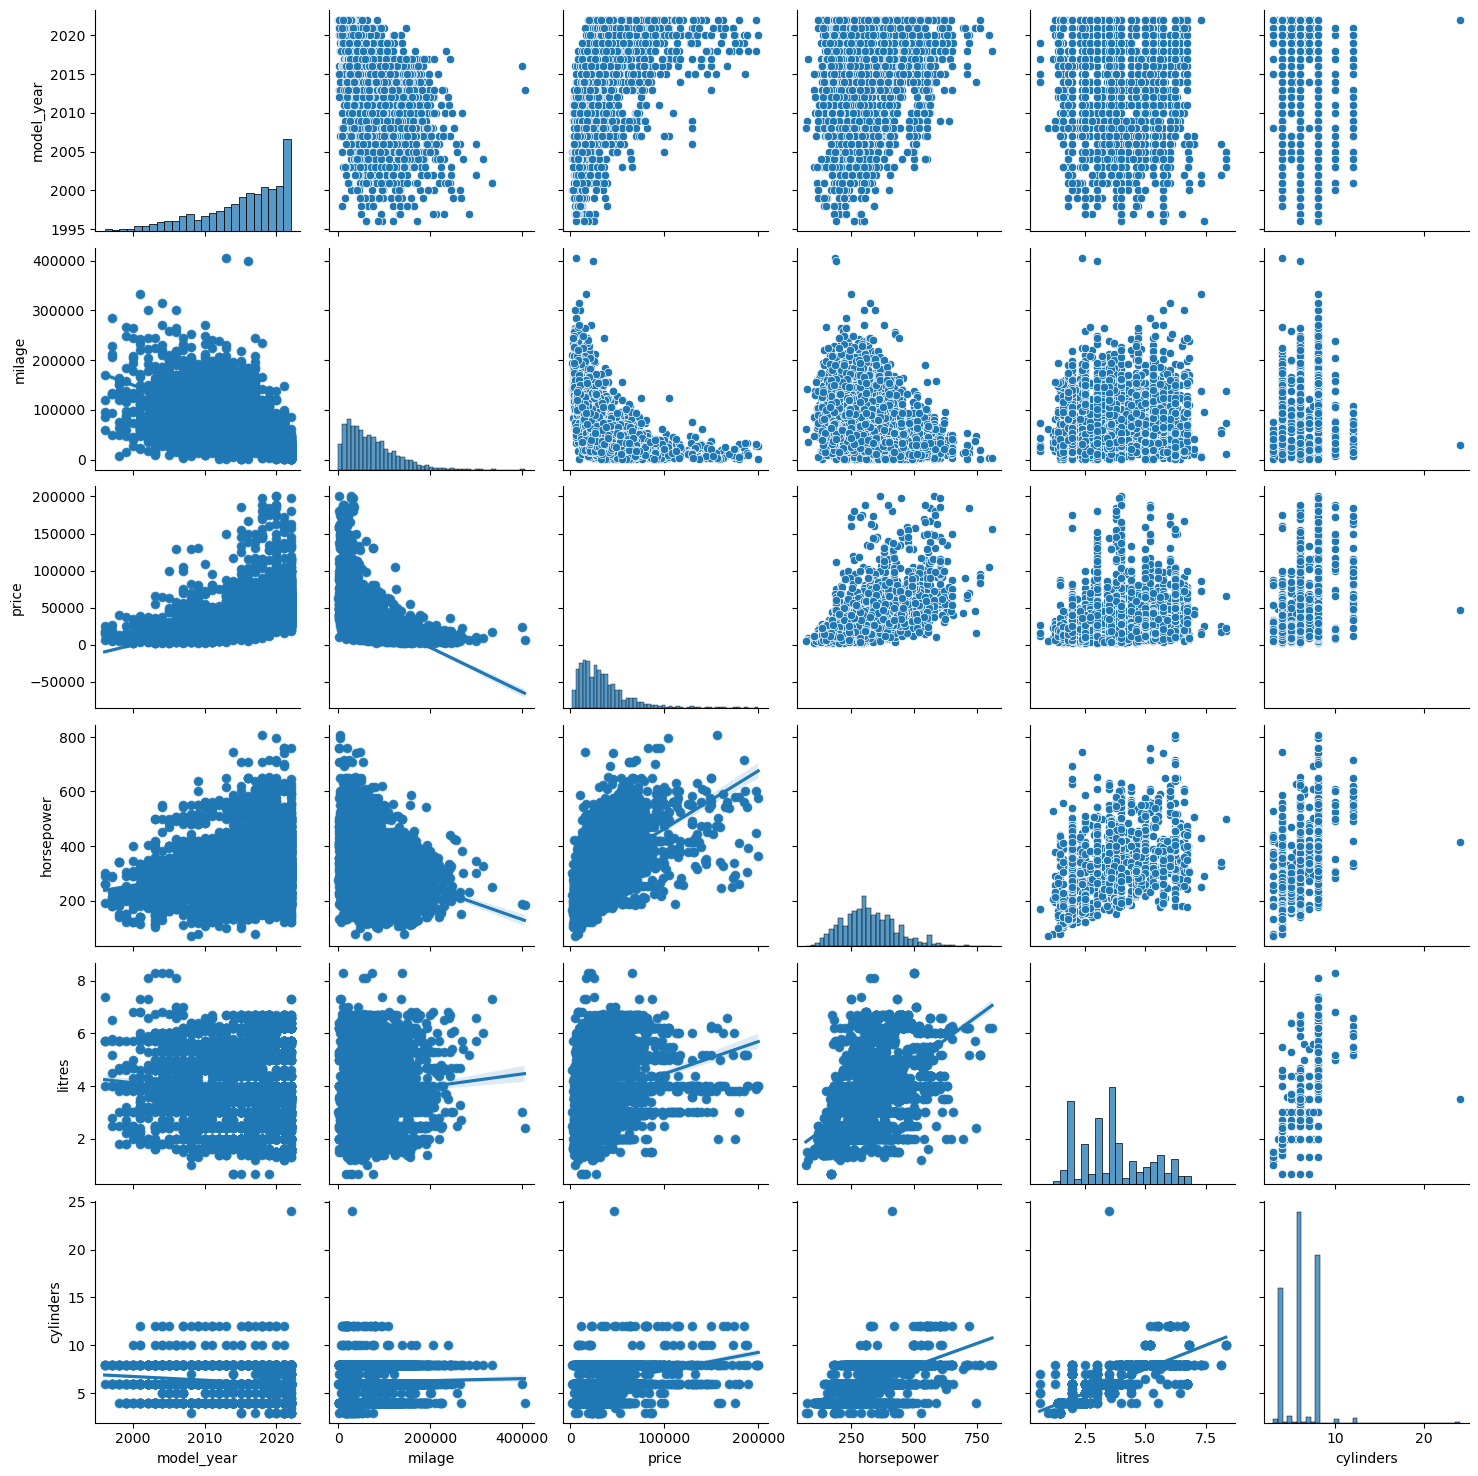

In [13]:
matrix = sns.pairplot(df)
matrix.map_lower(sns.regplot)

               price  model_year    milage  horsepower    litres  cylinders
price       1.000000    0.486867 -0.558964    0.545003  0.240132   0.308251
model_year  0.486867    1.000000 -0.586696    0.244959 -0.122781  -0.130185
milage     -0.558964   -0.586696  1.000000   -0.281965  0.087578   0.032671
horsepower  0.545003    0.244959 -0.281965    1.000000  0.537658   0.611432
litres      0.240132   -0.122781  0.087578    0.537658  1.000000   0.848685
cylinders   0.308251   -0.130185  0.032671    0.611432  0.848685   1.000000


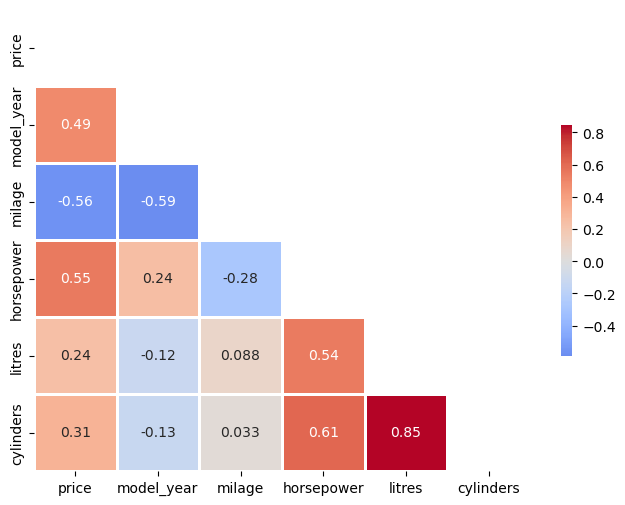

In [14]:
df = df[['price', 'model_year', 'milage', 'horsepower', 'litres', 'cylinders']]

corr = df.corr()

print(corr)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(8,6)) 
ax = sns.heatmap(corr, cmap='coolwarm', mask=mask, center=0, linewidths=2, annot=True, cbar_kws={'shrink': .5})

**Answer:**

*Your answer here*


### (ii) Univariate correlations with categorical attributes

In the following, you consider the categorical attributes. You start with *brand*, *fuel_type*, *accident*, and *clean_title*. Create boxplots for these features to capture the relationship with *price*, also showing the mean. What do you observe? Are there feature values for which you can clearly identify a relationship to the price attribute? Also, comment on the outliers and potential distribution inside a value's prices. Be brief in your answers. 

**[2.5 points]**

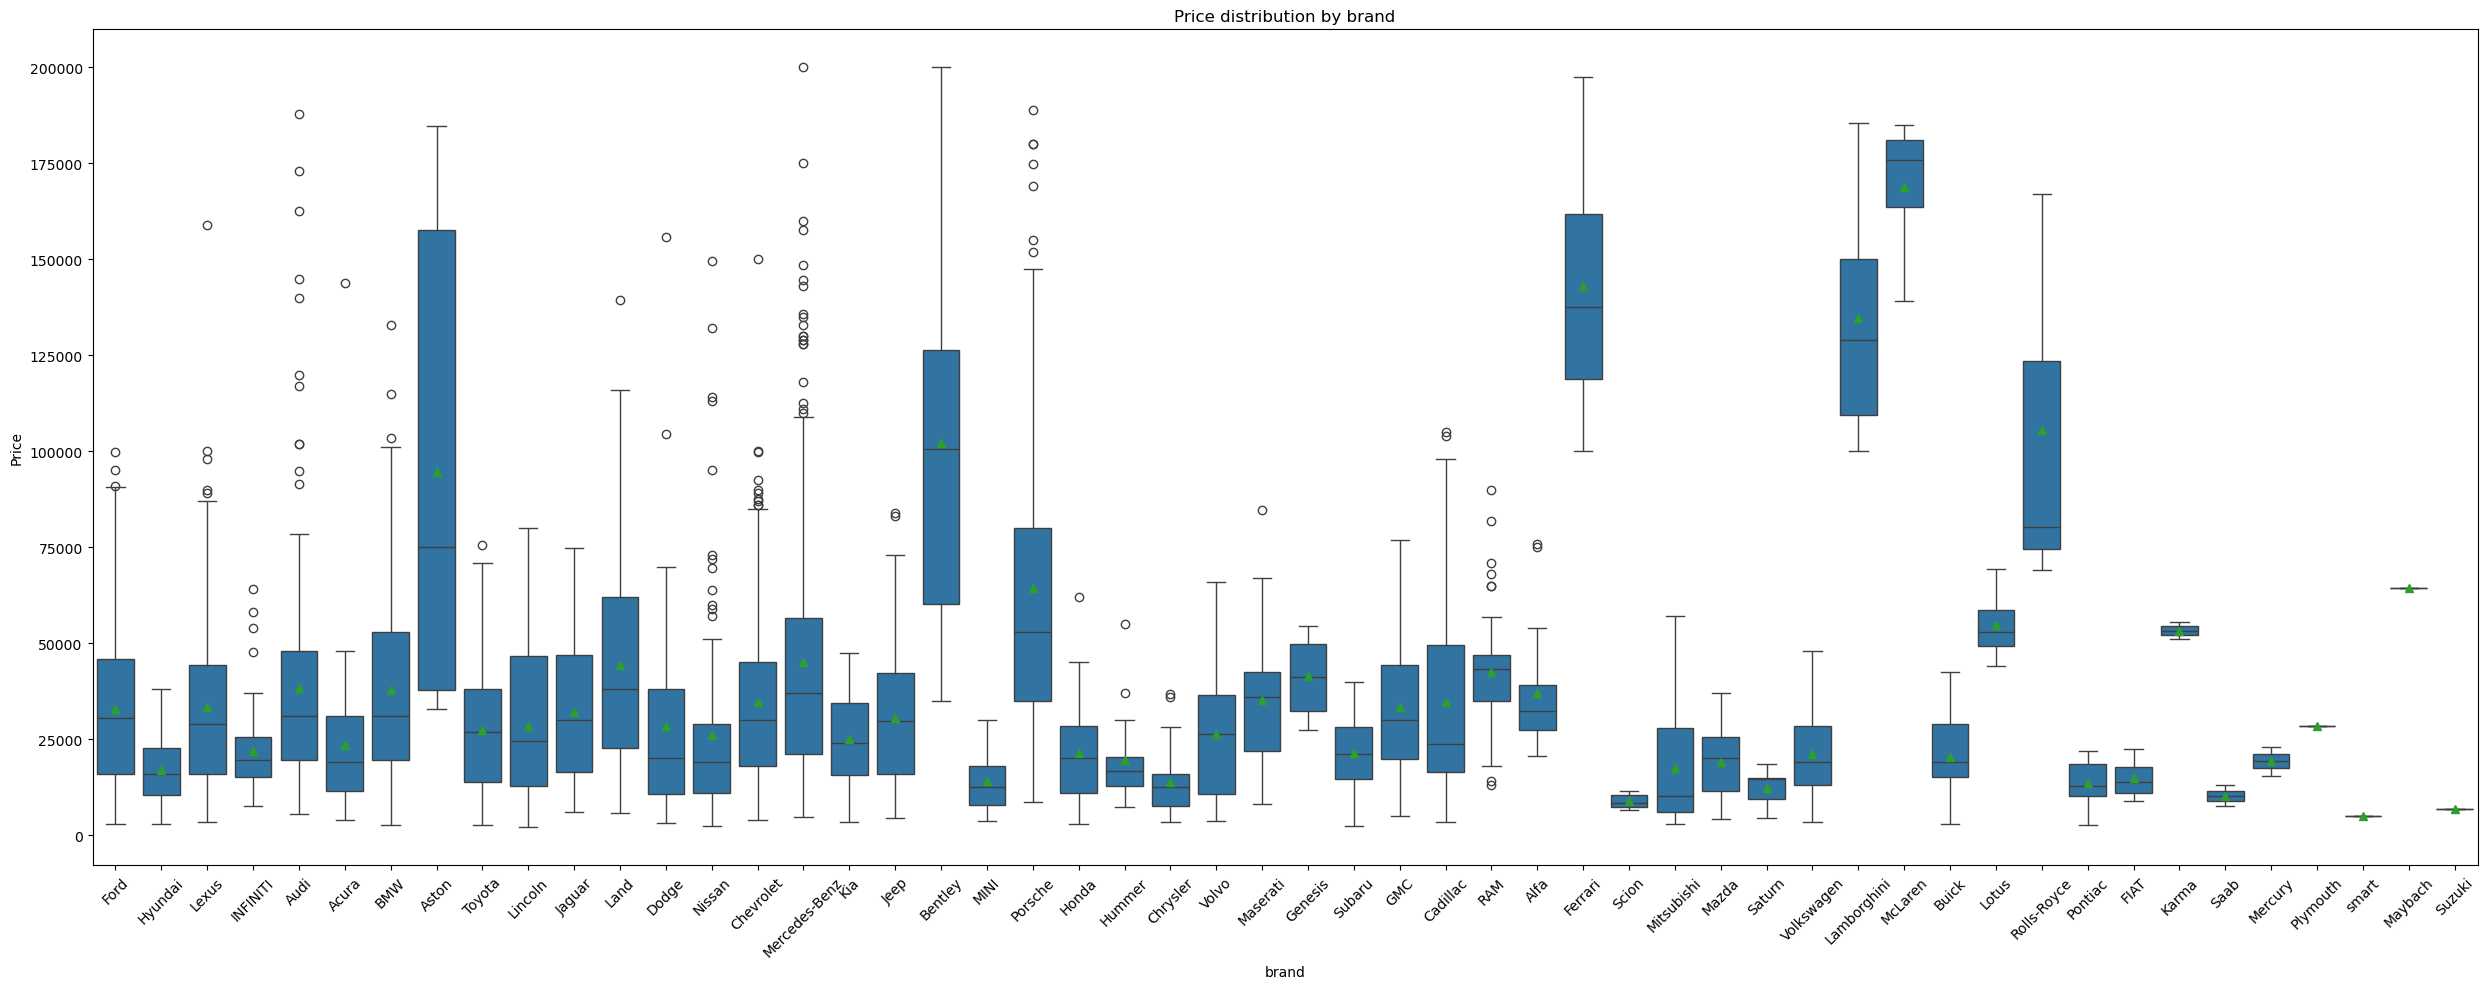

In [15]:
df = pd.read_csv("used_cars_preprocessed.csv")

f, ax = plt.subplots(figsize=(25,10)) 
ax = sns.boxplot(x='brand', y='price', data=df, showmeans=True)

plt.xticks(rotation=45)
plt.title('Price distribution by brand')
plt.ylabel('Price')
plt.xlabel('brand')
plt.tight_layout()
plt.show()


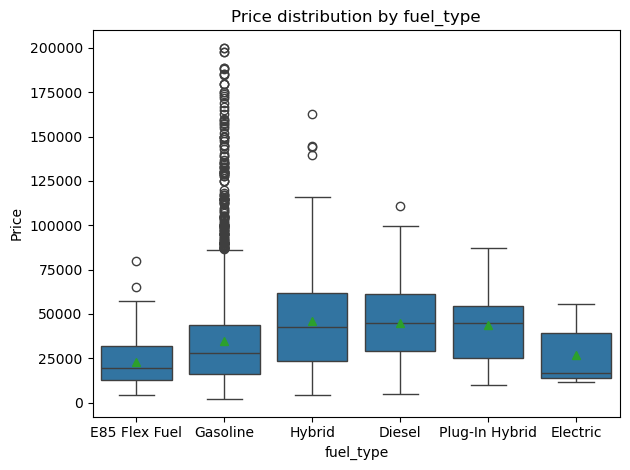

In [16]:
sns.boxplot(x='fuel_type', y='price', data=df, showmeans=True)

plt.title('Price distribution by fuel_type')
plt.ylabel('Price')
plt.xlabel('fuel_type')
plt.tight_layout()
plt.show()

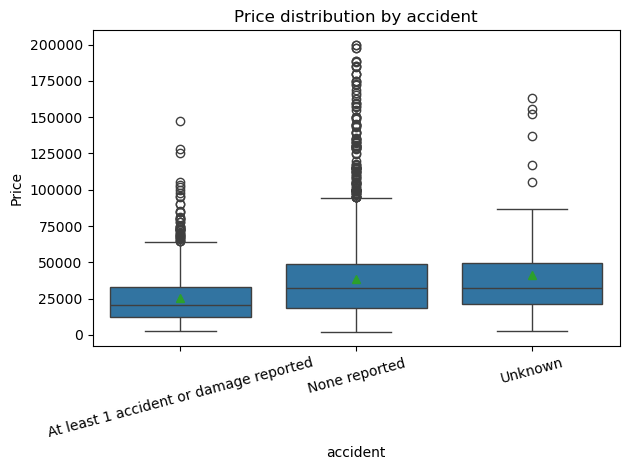

In [17]:
sns.boxplot(x='accident', y='price', data=df, showmeans=True)

plt.xticks(rotation=15)
plt.title('Price distribution by accident')
plt.ylabel('Price')
plt.xlabel('accident')
plt.tight_layout()
plt.show()

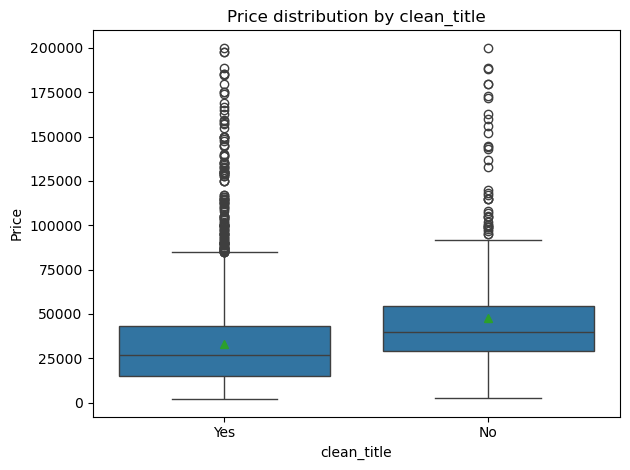

In [18]:
sns.boxplot(x='clean_title', y='price', data=df, showmeans=True)

plt.title('Price distribution by clean_title')
plt.ylabel('Price')
plt.xlabel('clean_title')
plt.tight_layout()
plt.show()

**Answer:**

*Your answer here*

### (iii) Multivariate correlations with categorical attributes

As the current analysis provides limited insight, you want to include a multivariate view using boxplots that also show the mean. Again, you decide on *brand*, *fuel_type*, *accident*, and *clean_title* as features. You create a boxplot for each pair of features with *price* still being your target. Based on these, provide a **superficial** conclusion. Each of the following cells focuses on one feature in particular. 

*Hint*: You may want to use Seaborn's boxplot functionality while fixing the hue to each feature mentioned in the following cells (for inspiration, see, e.g., Seaborn's gallery: https://seaborn.pydata.org/examples/index.html)

**[2 points]**

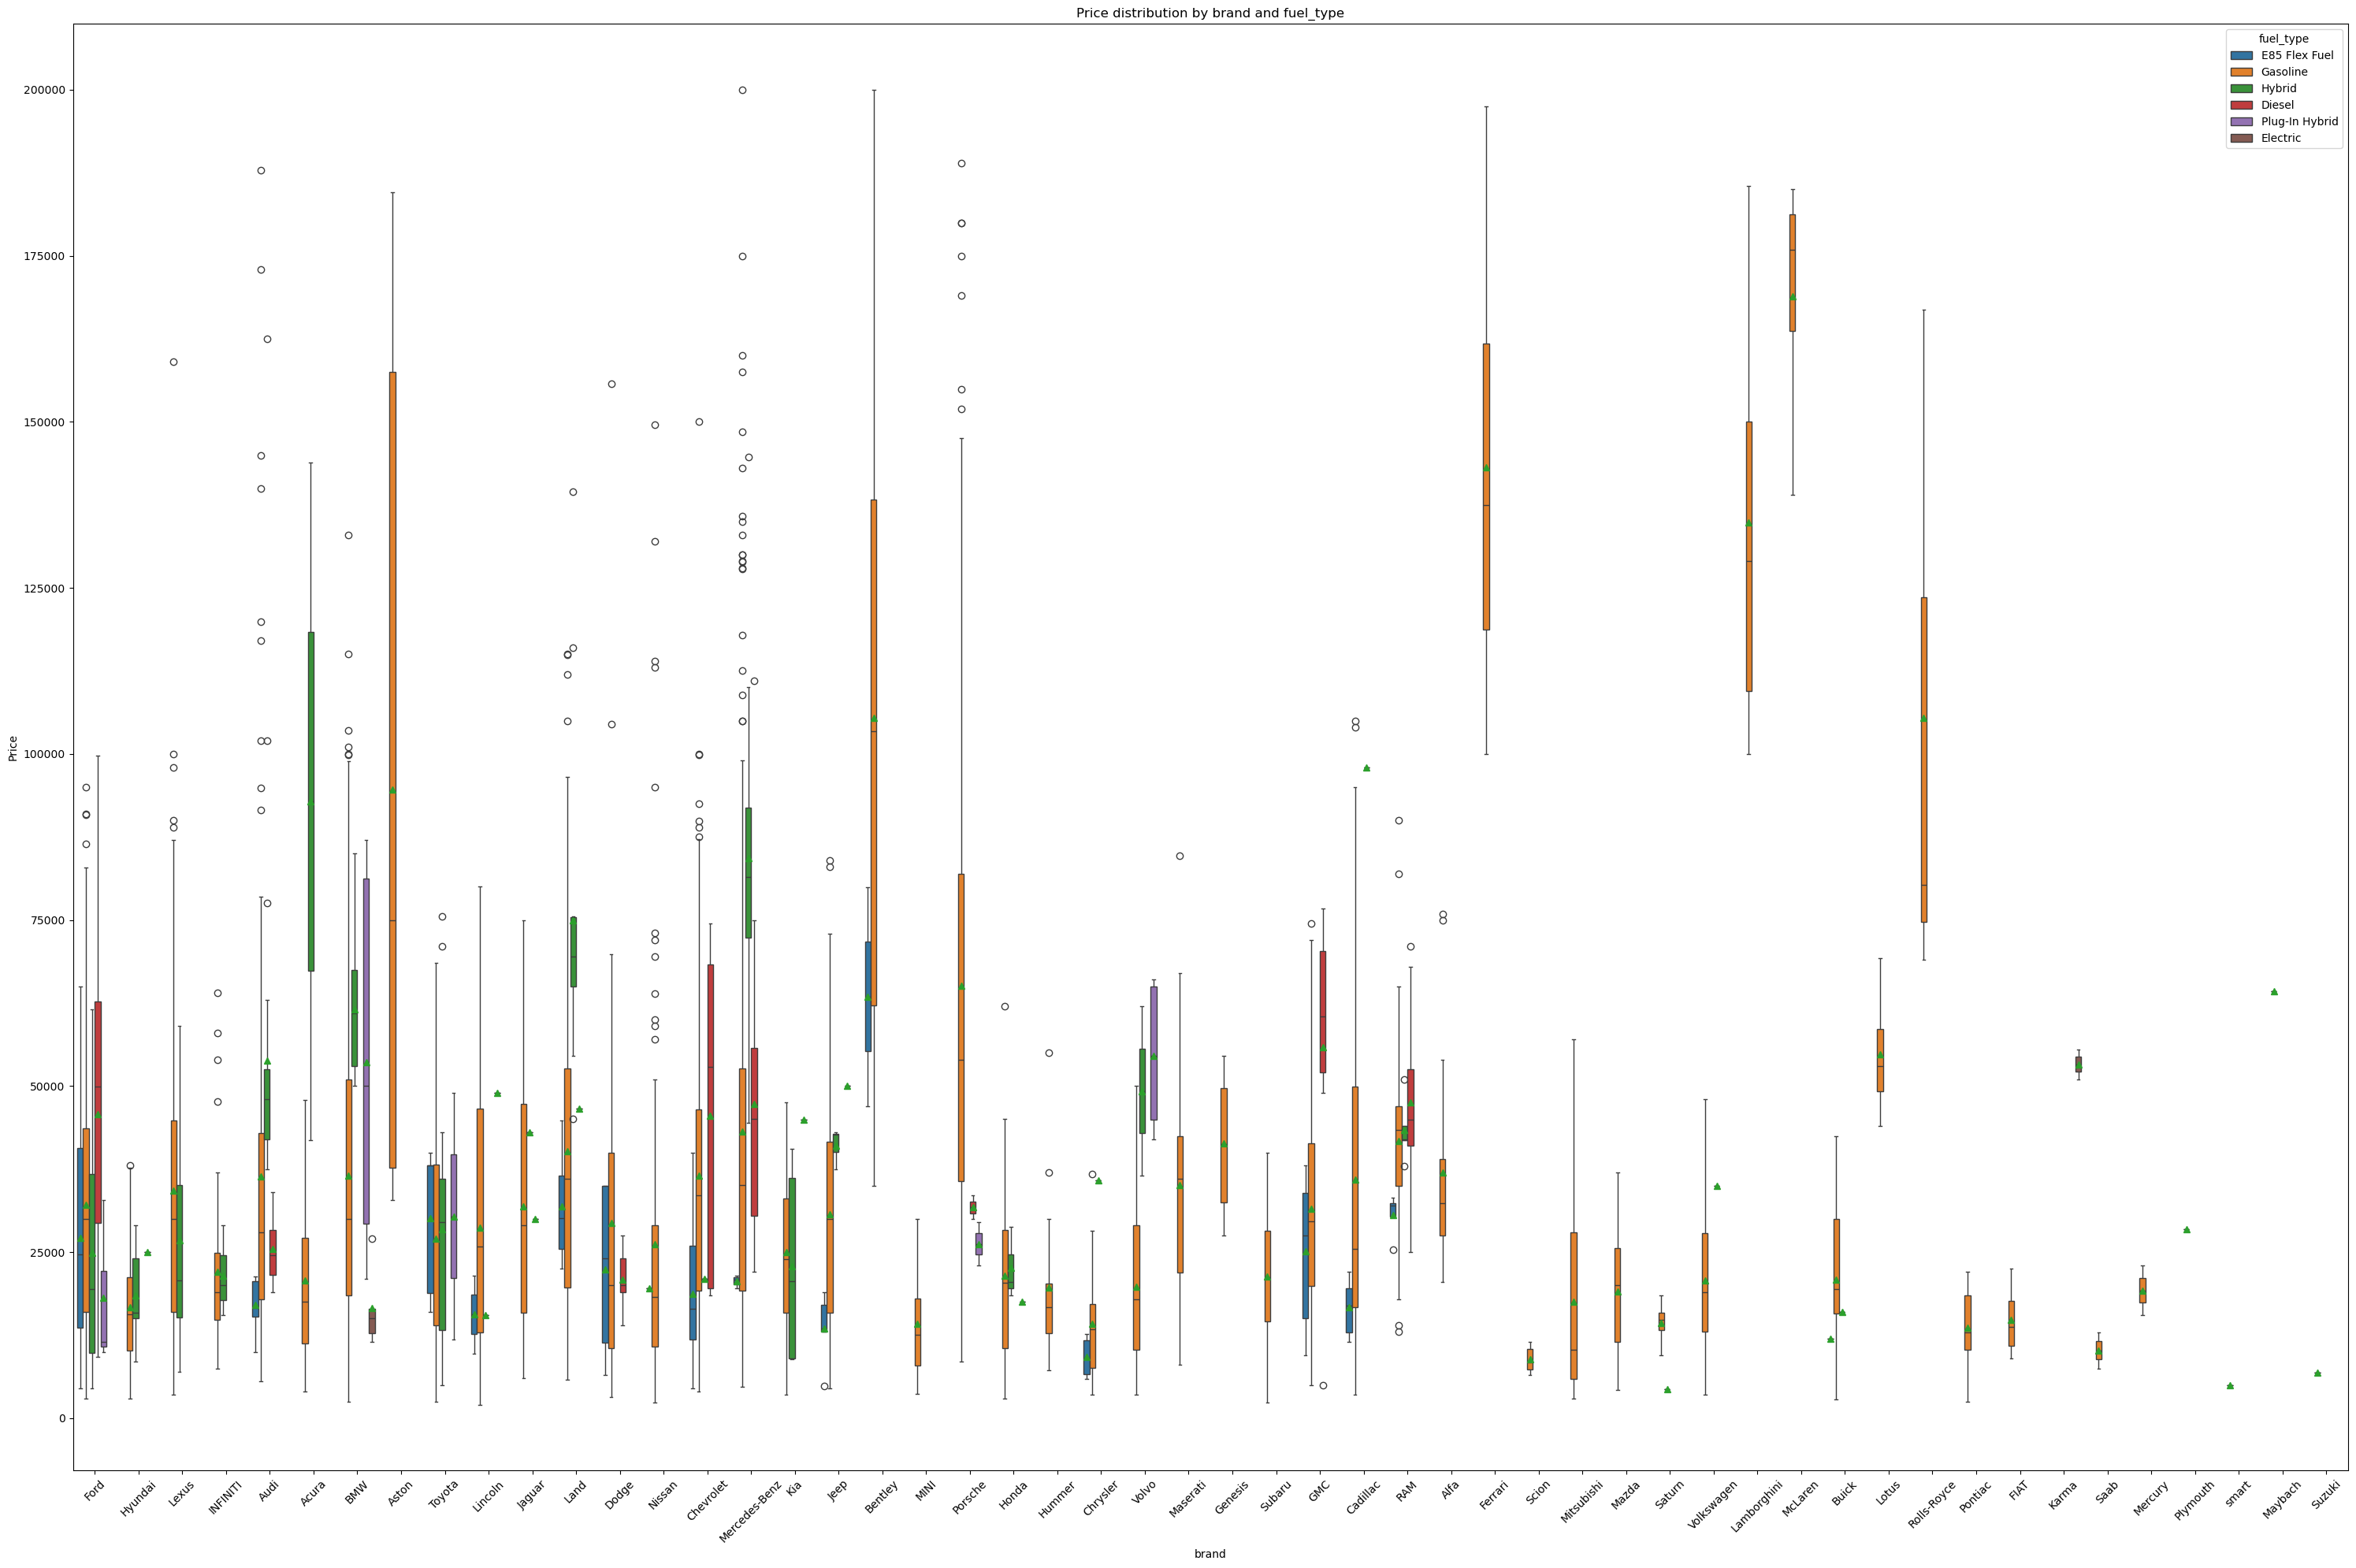

In [19]:
df = pd.read_csv("used_cars_preprocessed.csv")

f, ax = plt.subplots(figsize=(30, 20))
ax = sns.boxplot(x='brand', y='price', hue='fuel_type', data=df, showmeans=True)

plt.xticks(rotation=45)
plt.title('Price distribution by brand and fuel_type')
plt.ylabel('Price')
plt.xlabel('brand')
plt.tight_layout()
plt.show()

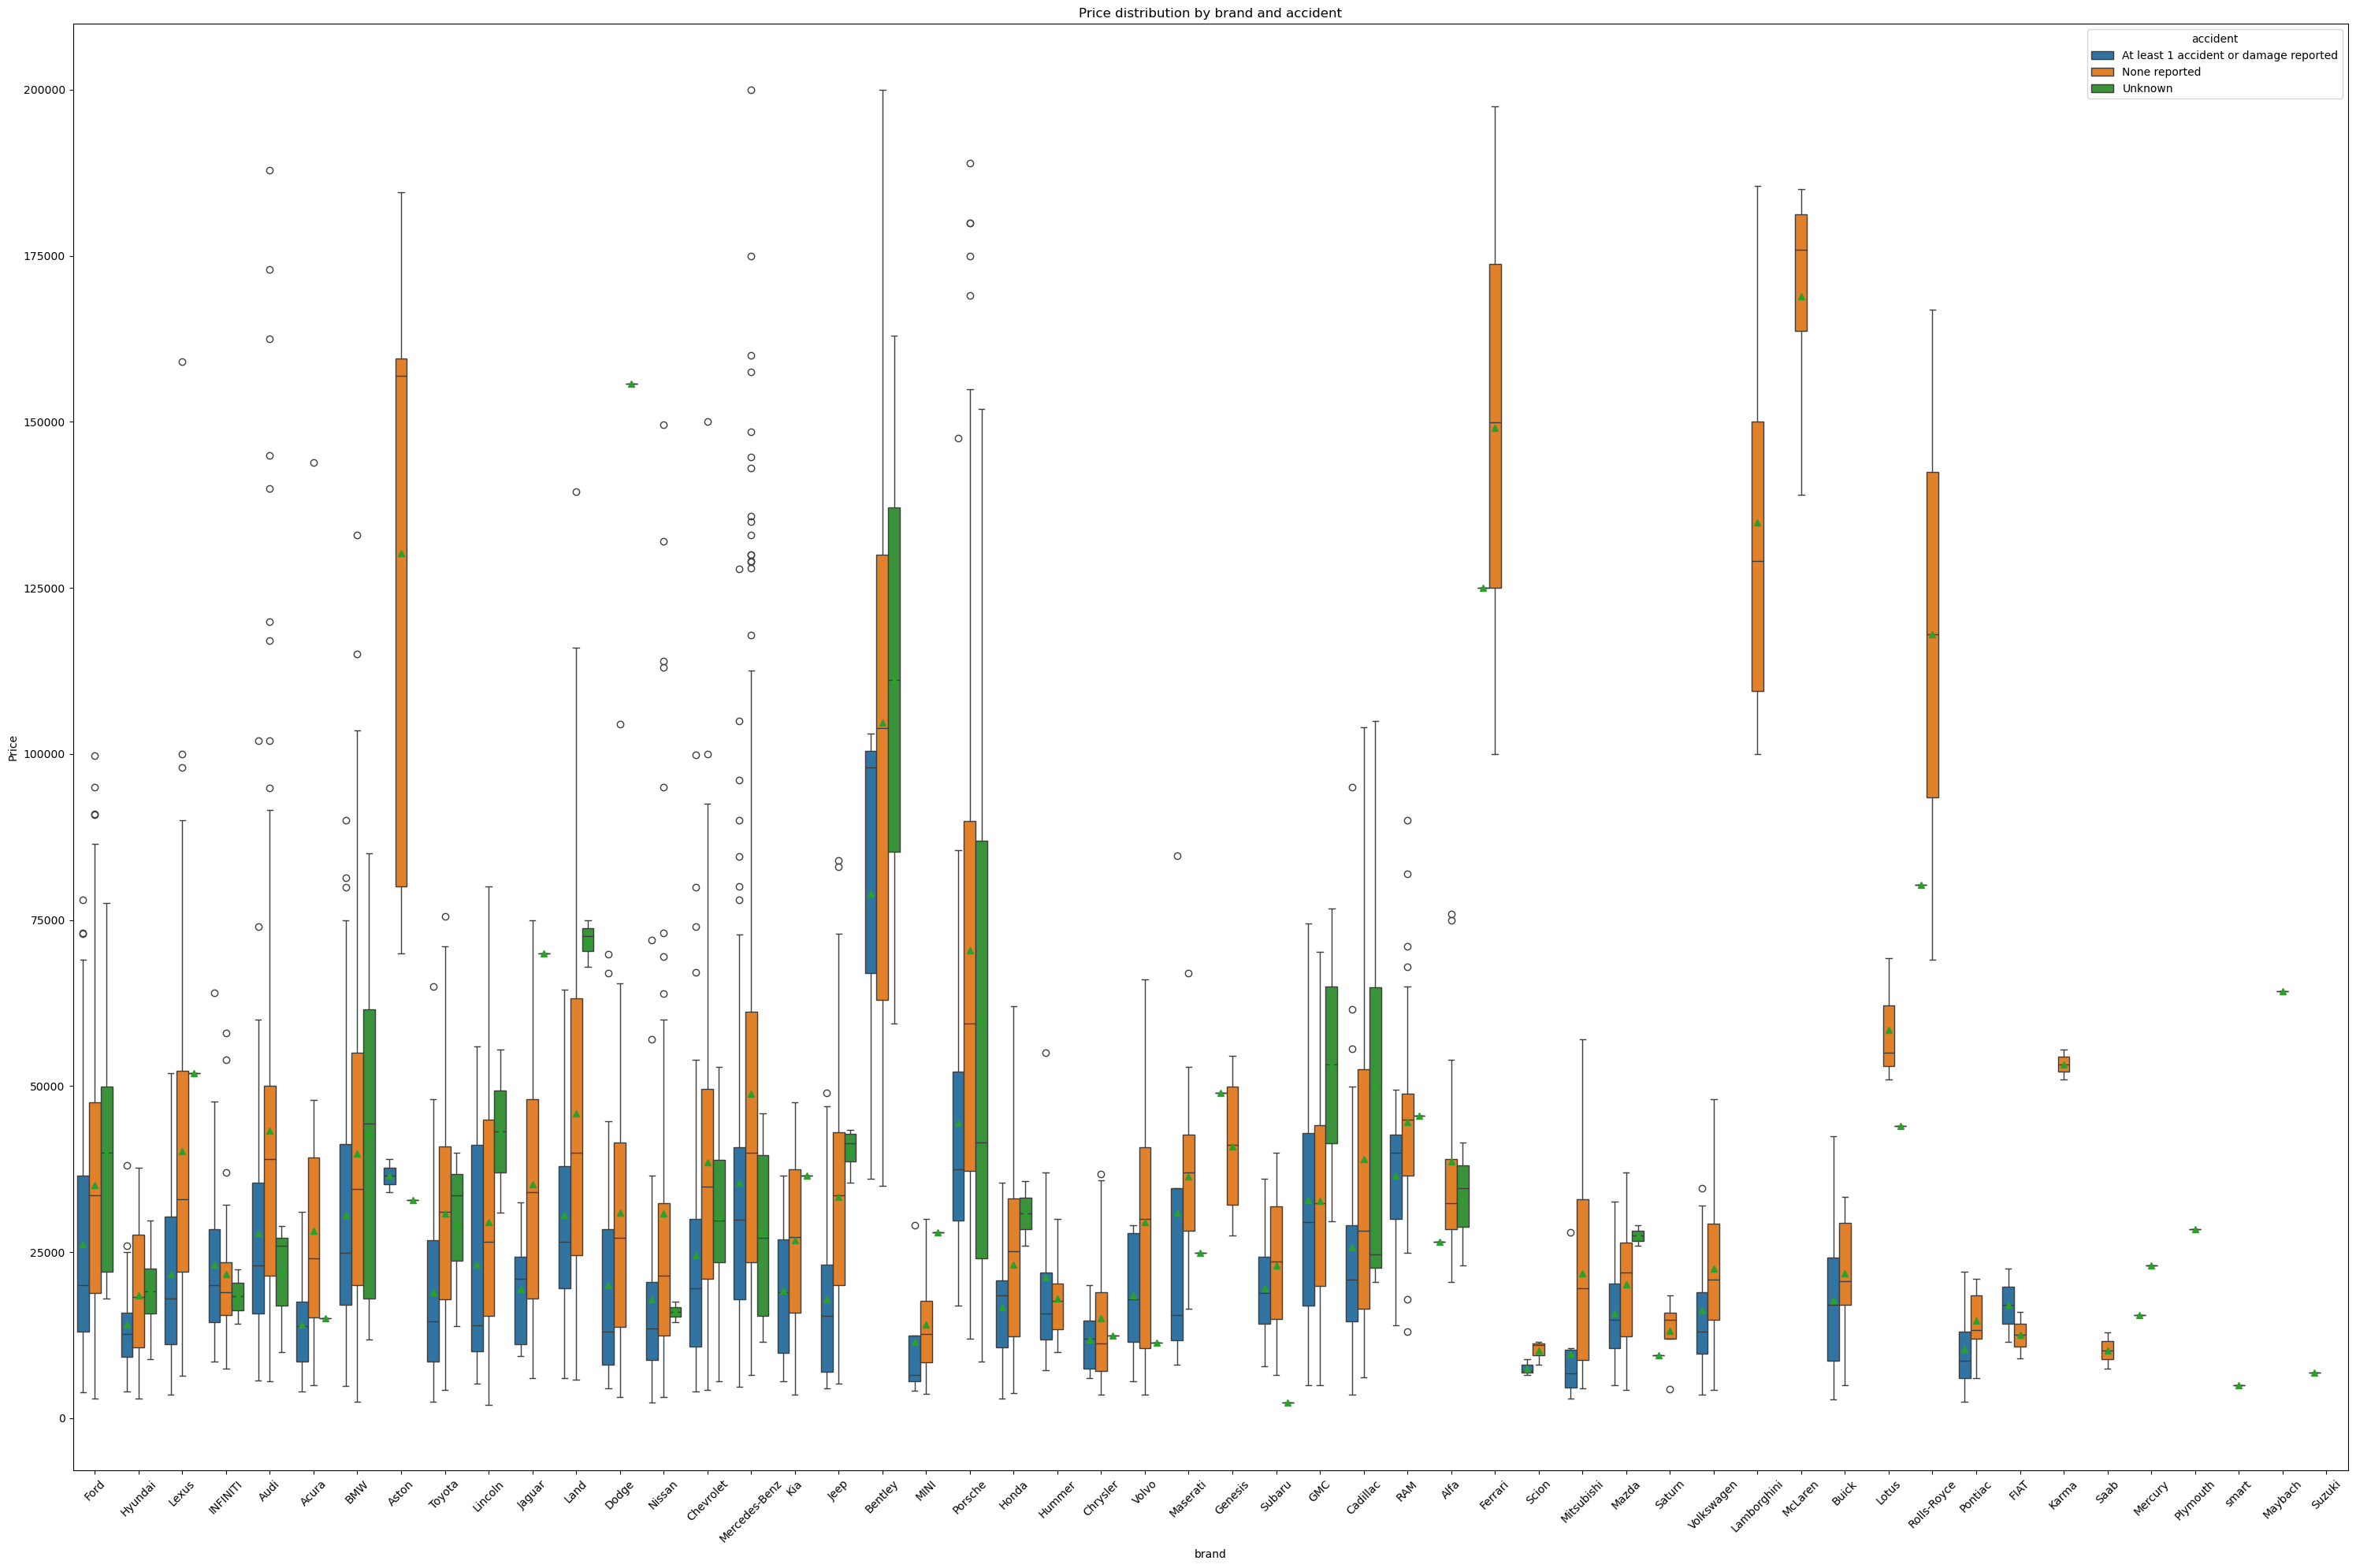

In [20]:
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.boxplot(x='brand', y='price', hue='accident', data=df, showmeans=True)

plt.xticks(rotation=45)
plt.title('Price distribution by brand and accident')
plt.ylabel('Price')
plt.xlabel('brand')
plt.tight_layout()
plt.show()

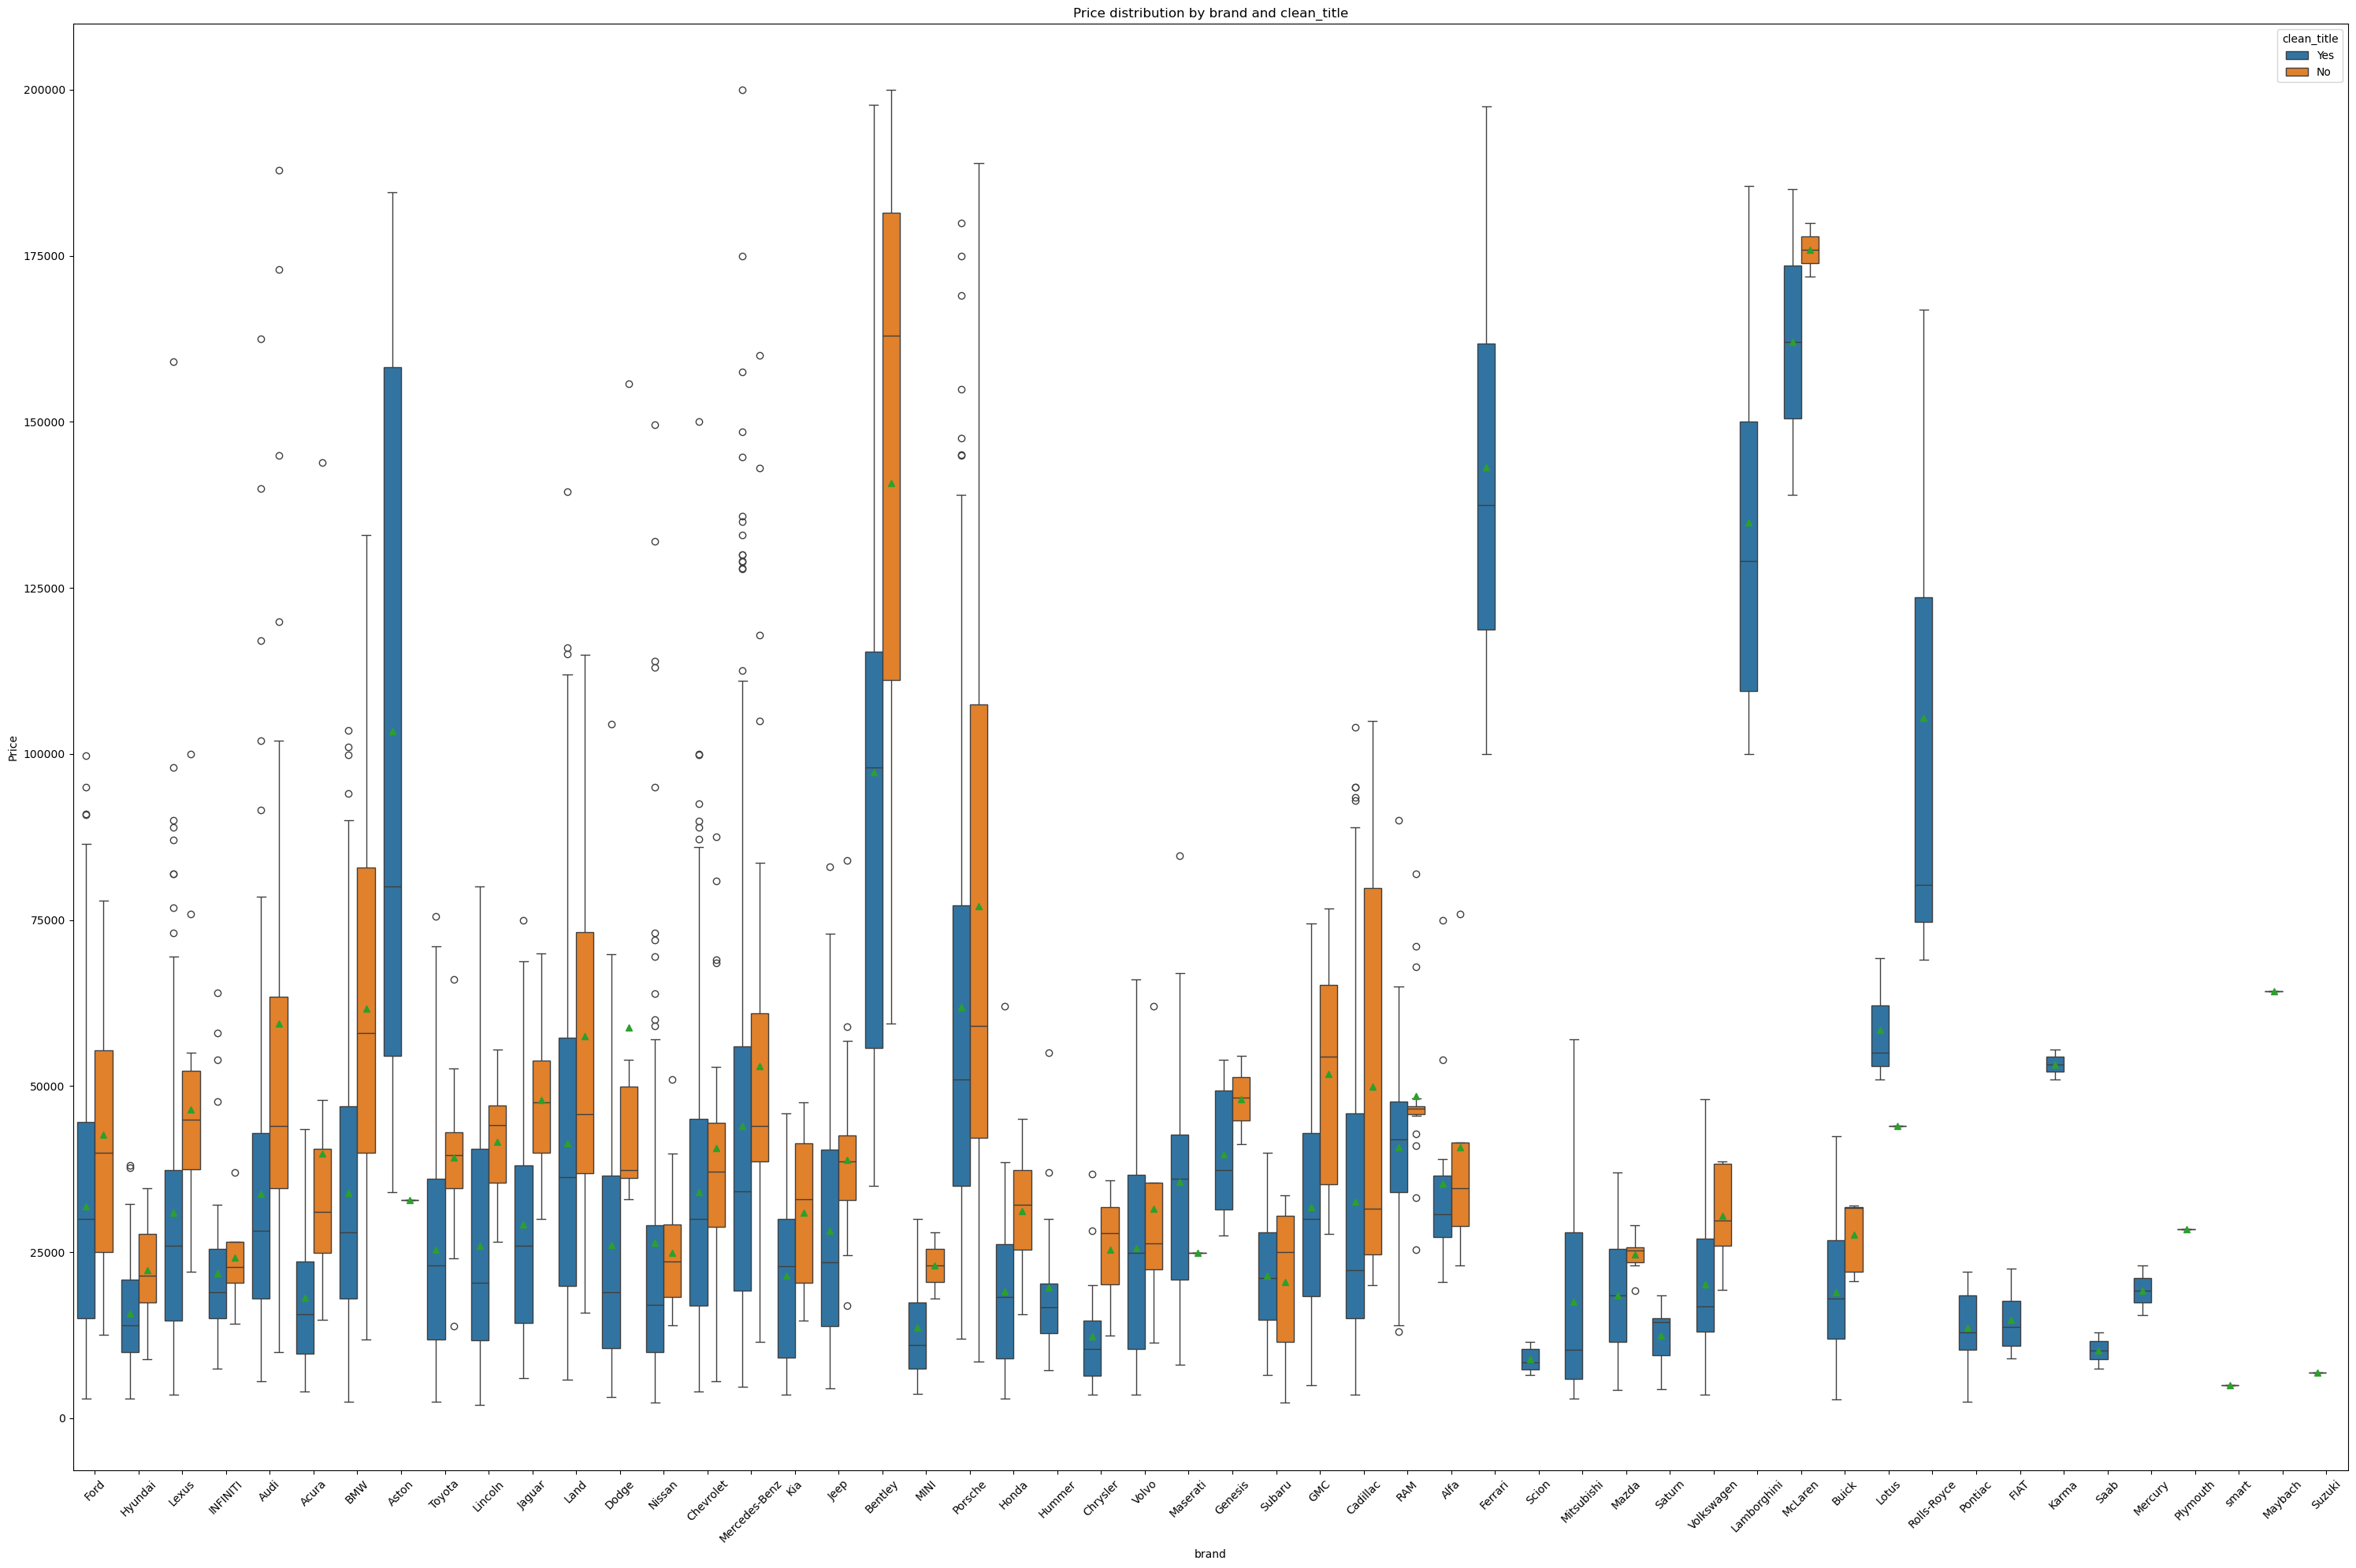

In [21]:
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.boxplot(x='brand', y='price', hue='clean_title', data=df, showmeans=True)

plt.xticks(rotation=45)
plt.title('Price distribution by brand and clean_title')
plt.ylabel('Price')
plt.xlabel('brand')
plt.tight_layout()
plt.show()

**Answer: **[2 points]****

*Your answer here*

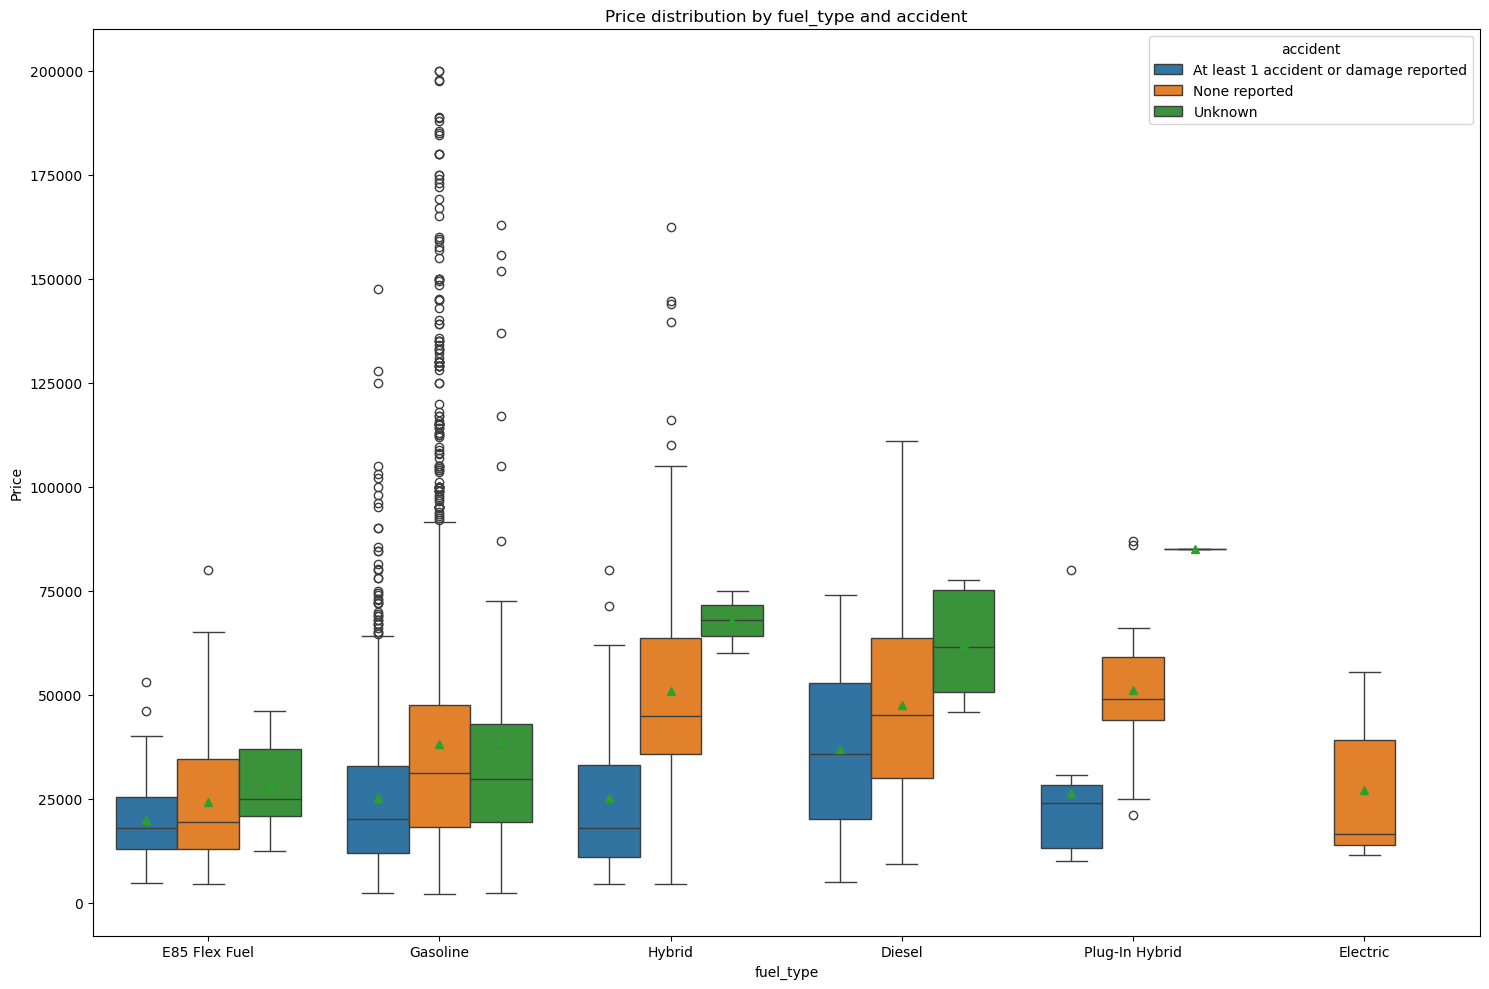

In [22]:
# Multivariate analysis for fuel_type

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='fuel_type', y='price', hue='accident', data=df, showmeans=True)

plt.title('Price distribution by fuel_type and accident')
plt.ylabel('Price')
plt.xlabel('fuel_type')
plt.tight_layout()
plt.show()

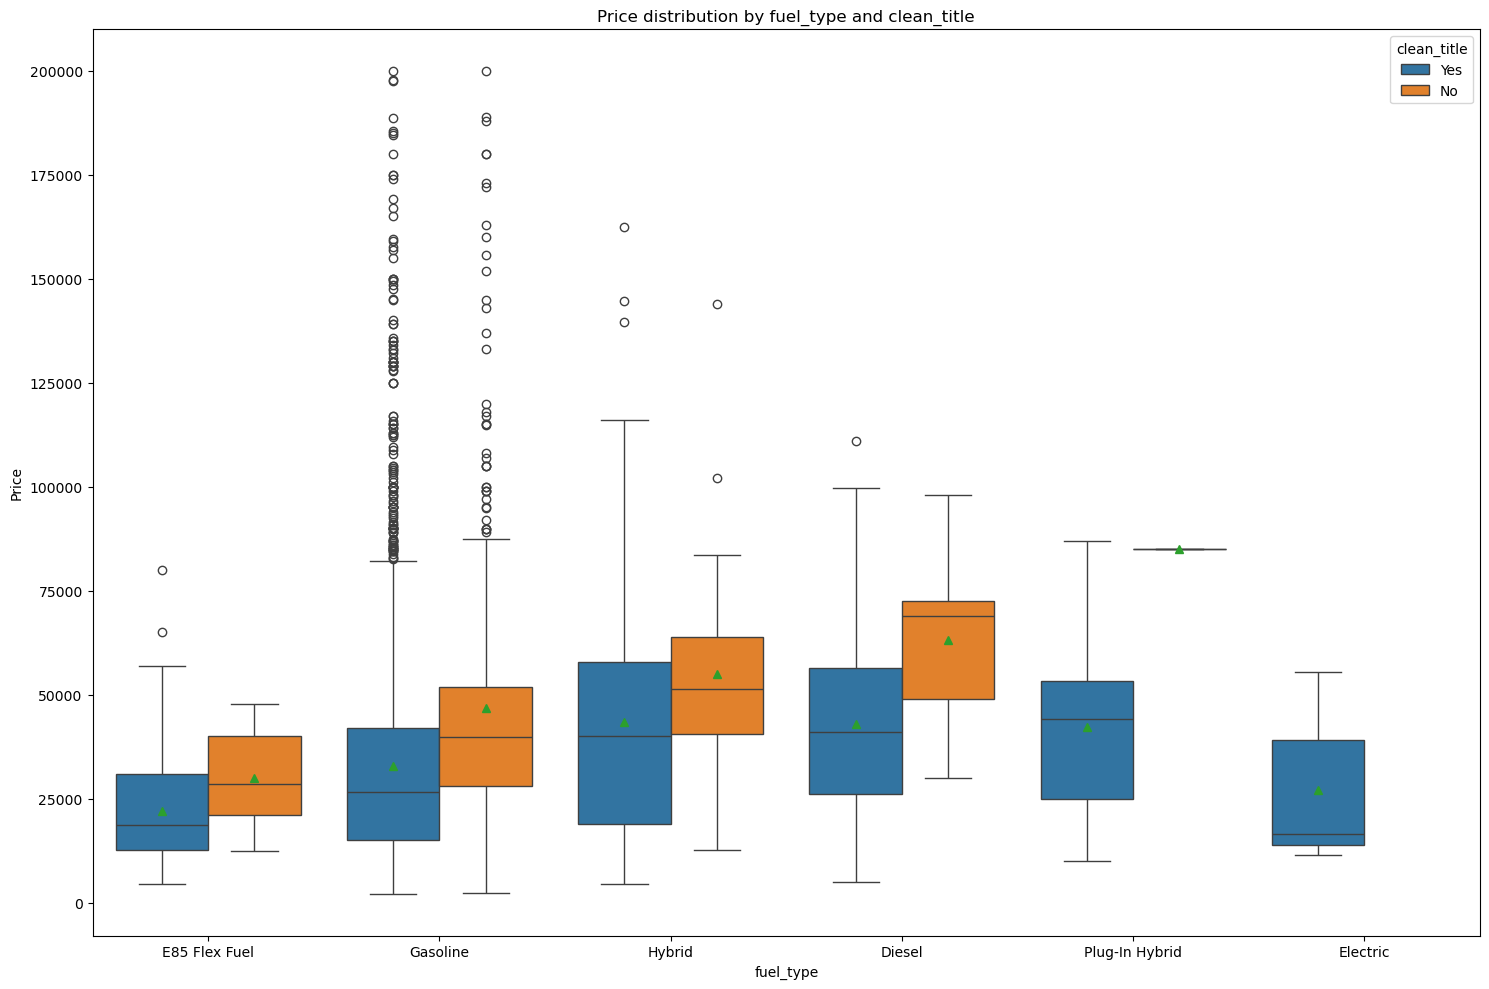

In [23]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='fuel_type', y='price', hue='clean_title', data=df, showmeans=True)

plt.title('Price distribution by fuel_type and clean_title')
plt.ylabel('Price')
plt.xlabel('fuel_type')
plt.tight_layout()
plt.show()

**Answer: **[1.5 points]****

*Your answer here*

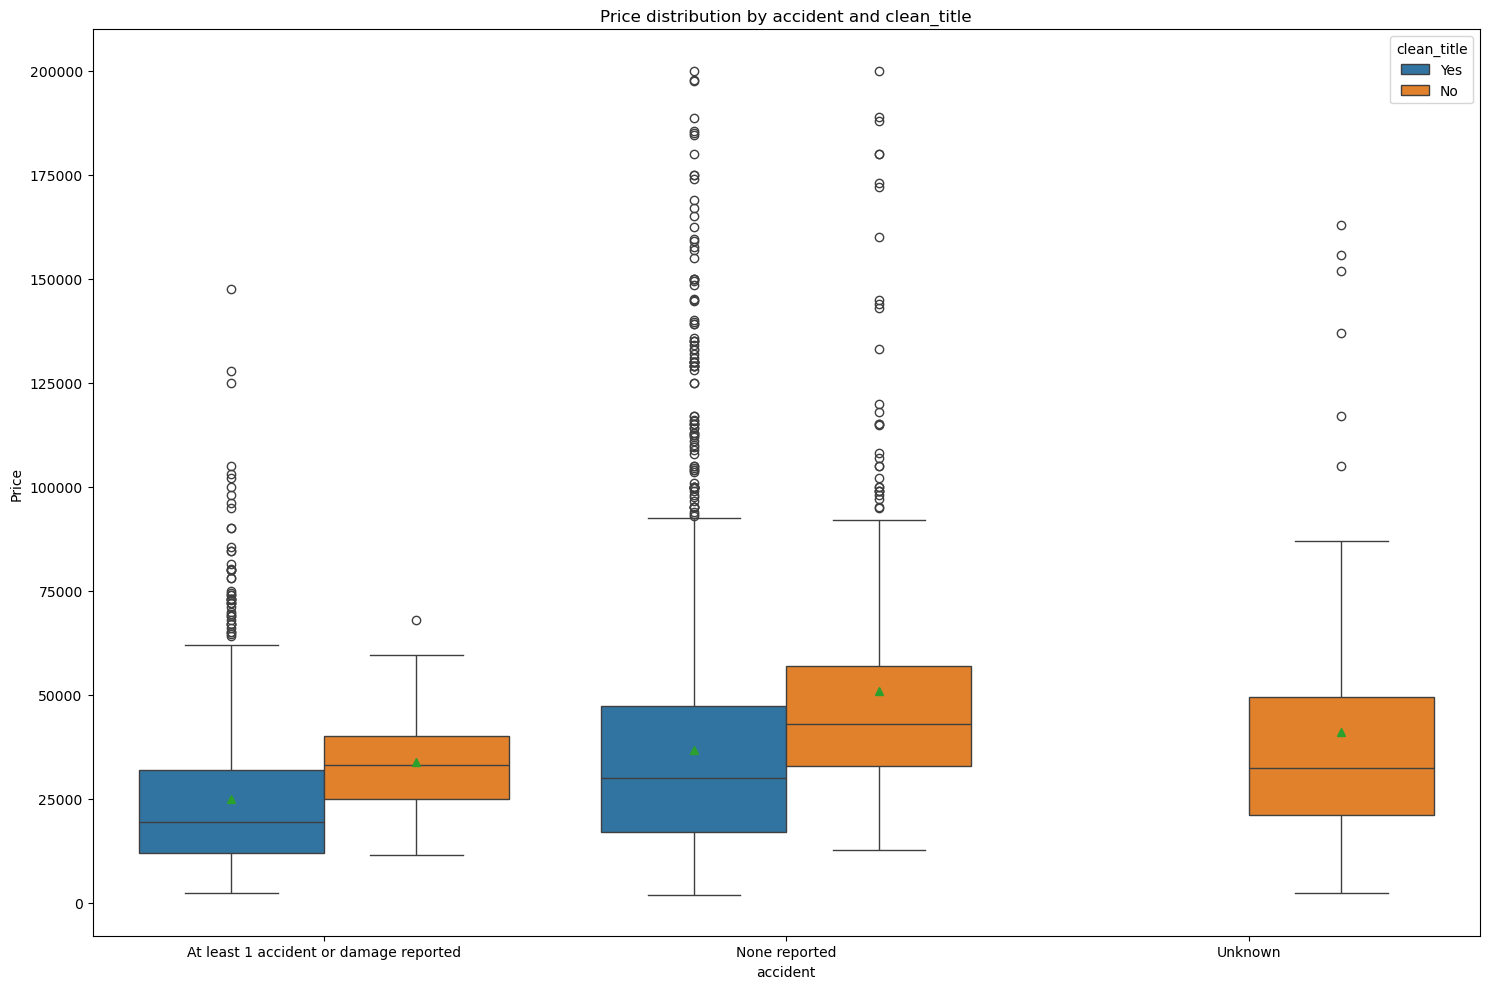

In [24]:
# Multivariate analysis for clean_title

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x='accident', y='price', hue='clean_title', data=df, showmeans=True)

plt.title('Price distribution by accident and clean_title')
plt.ylabel('Price')
plt.xlabel('accident')
plt.tight_layout()
plt.show()

**Answer: [1 point]**

*Your answer here*

# Q3: Predicting prices **[62 points]**

After a long day at the office, you and N. go to a local bar to catch up with your old friend W. Over a round of cold drinks, you begin to share the great news about your booming business. Being an expert in data analytics himself, W. is also curious to hear your plans to apply your data science knowledge.

"I've been thinking about selling my old Porsche to make room for a new one," W. says to you. "I'm wondering what price to set for the old one. This is the perfect opportunity for you to try out your new predictive models, don't you think?"

You agree! W. writes down the properties of his Porsche (in the following, also referred to as *target car*) on a napkin. You tell W. that you will call him as soon as you can make a confident estimate for the price of his car. The next morning, you immediately start working on predictive models for car prices.
If not sated otherwise, you use the entire pre-processed dataset to create each of the models - load the dataset new at the beginning of every partial question a), b),...d) so you don't accidentally use data you have changed for a different kind of model. 


In [25]:
car = pd.DataFrame([{
      "brand": "Porsche",
      "model":  "911 Carrera S",
      "model_year": 2015,
      "milage": 84500.0,
      "fuel_type": "Gasoline",
      "engine": "400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel",
      "transmission": "7-Speed A/T",
      "ext_col": "Black",
      "int_col": "Black",
      "accident": "None reported",
      "clean_title": "Yes",
      "horsepower": 400.0,
      "litres": 3.8,
      "cylinders": 6.0
}])

## (a) Baseline **[2 points]**

First, you want to set a baseline to compare against. The baseline should always use the average price of all cars as a recommended price. Use the pre-processed dataset and the `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. To stay consistent, the same split between training and test set should be used throughout the entire assignment.

What are the values of the mean absolute error and the root-mean-squared error? 

**[2 points]**

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("used_cars_preprocessed.csv")

X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)
estimated_prices = np.full_like(y_test, fill_value=df['price'].mean())

mae = mean_absolute_error(y_test, estimated_prices)
mse = mean_squared_error(y_test, estimated_prices)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 20529.005649717514
Root Mean Squared Error (RMSE): 30574.462403725698


## (b) Prediction by classification **[16 points]**

Next, you try to price your car according to similar cars using a decision tree.

### (i) Price binning

In the following, we want to know the price ranges for selling cars. To use decision trees, you need to discretize prices. We use the following price bins:
- [1,800, 10,000]
- (10,000, 20,000]
- (20,000, 30,000]
- (30,000, 40,000]
- (40,000, 50,000]
- (50,000, 60,000]
- (60,000, 80,000]
- (80,000, 100,000]
- (100,000, 120,000]
- (120,000, 140,000]
- (140,000, 160,000]
- (160,000, 180,000]
- (180,000, 220,000]

Add the attribute *Price_Bins* to the entire pre-processed data set using the discretization mentioned above for each car. For example, if a car costs 2500, it is put into the bin [1,800, 10,000]. 

**[1 point]**

In [27]:
df = pd.read_csv("used_cars_preprocessed.csv")
y = df['price']

pd.cut(y, bins=[1800, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 220000], right=True)

0       (10000, 20000]
1       (30000, 40000]
2       (50000, 60000]
3       (10000, 20000]
4       (30000, 40000]
             ...      
3526     (1800, 10000]
3527    (20000, 30000]
3528    (50000, 60000]
3529    (60000, 80000]
3530    (30000, 40000]
Name: price, Length: 3531, dtype: category
Categories (13, interval[int64, right]): [(1800, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000] ... (120000, 140000] < (140000, 160000] < (160000, 180000] < (180000, 220000]]

You predicted a price range for cars. However, since you cannot enter a price range for selling a car, you have to map each bin to a value. To do so, you use the mean of bins to predict the price. For example, the bin (10,000, 20,000] is mapped to 15,000. Create a dictionary you can use for this mapping. 

**[1 point]**

In [28]:
df.loc[:,"Price_Bins"] = pd.cut(y, bins=[1800, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 220000], labels=[5900, 15000, 25000, 35000, 45000, 55000, 65000, 70000, 90000, 130000, 150000, 170000, 200000], right=True)
df.Price_Bins

0       15000
1       35000
2       55000
3       15000
4       35000
        ...  
3526     5900
3527    25000
3528    55000
3529    65000
3530    35000
Name: Price_Bins, Length: 3531, dtype: category
Categories (13, int64): [5900 < 15000 < 25000 < 35000 ... 130000 < 150000 < 170000 < 200000]

### (ii) Data transformation for decision trees

You want to apply a decision tree to predict the price. You decide to use *brand*, *fuel_type*, *model_year*, *accident* and *clean_title* as descriptive features and *Price_Bins* as the target feature. 

You split the data into a train and test set. For the train-test split, use `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`

In order to apply the sklearn method for decision trees, you need to encode the categorical variables. For the encoding, use the `OneHotEncoder` from *sklearn* with `sparse_output=False`.
  
*Hint*: You later need the continous prices of your test set to compute errors, so better store them.

*Hint*: Applying `get_feature_names_out()` on your encoder provides you a list of columns after the transformation.

**[2 points]**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

dataset_data  = df[["brand", "fuel_type", "model_year", "accident", "clean_title"]].copy()
enc = OneHotEncoder(sparse_output=False) 
dataset_data = enc.fit_transform(dataset_data)
feature_names = enc.get_feature_names_out(input_features=["brand", "fuel_type", "model_year", "accident", "clean_title"]).tolist()
dataset_target = df[["Price_Bins"]]

X_train, X_test,Y_train, Y_test = train_test_split(dataset_data, dataset_target, test_size=0.05,random_state=3)

### (iii) Model training

In the following, you want to use a good deicision tree for predicting prices. To do so,you want to test a set of different values, in particular, max depth of a tree. You test values in [1, 9] (in steps of size one).

You use the the algorithm from the *sklearn* library. You set as criterion "entropy", `min_samples_leaf=6`, and `random_state=42`.

Your goal is to minimize the mean absolute error. Create the prediction using the bins and only apply the dictionary mapping the bins to means to the predicted values before calculating the error. 

Create a summarizing plot, in which the x-axis represents the maximum tree depth, and the y-axis the mean absolute error as well as the root-mean-square error.

**[5 points]**

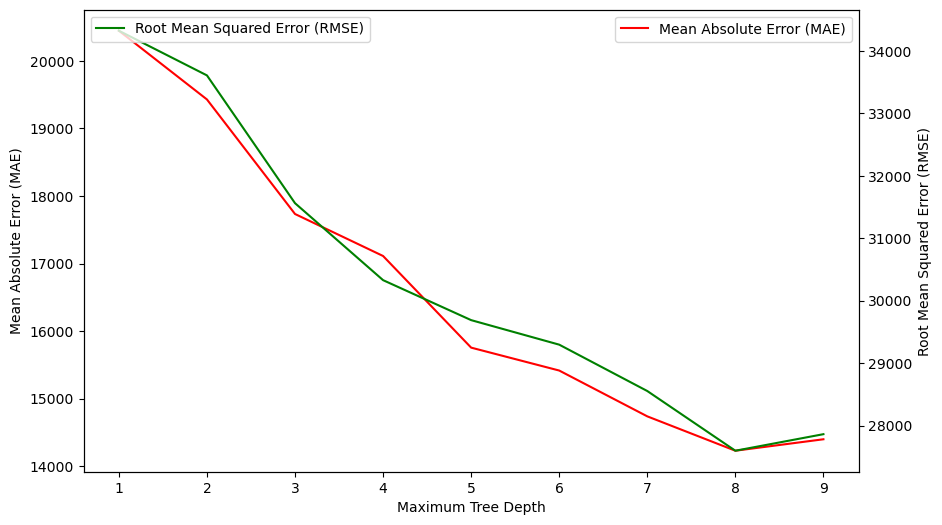

     target   Bins
0     25000  25000
1     35000  35000
2     15000  15000
3     25000  25000
4     15000  15000
..      ...    ...
172   15000  15000
173   15000  15000
174   35000  35000
175   15000  15000
176   15000  15000

[177 rows x 2 columns]
[20445.197740112995, 19428.248587570622, 17733.333333333332, 17111.86440677966, 15755.93220338983, 15416.949152542373, 14738.983050847457, 14230.50847457627, 14400.0]
[34322.793072443645, 33607.537155708334, 31561.578229533818, 30329.22738709816, 29689.121826053728, 29296.41809154065, 28554.198638501584, 27598.368493496582, 27863.22323493009]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree

max_depth_values = np.arange(1,10)
mae_scores = []
rmse_scores = []
pred = pd.DataFrame()
for max_depth in max_depth_values:
    decisionTree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth, min_samples_leaf=6, random_state=42)
    decisionTree.fit(X_train,Y_train)
    pred.loc[:,"target"] = decisionTree.predict(X_test)
    pred.loc[:,"Bins"] = pd.cut(pred.target, bins=[1800, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 220000], labels=[5900, 15000, 25000, 35000, 45000, 55000, 65000, 70000, 90000, 130000, 150000, 170000, 200000],right=True)

    mae = mean_absolute_error(Y_test, pred.Bins)
    mse = mean_squared_error(Y_test, pred.Bins)
    rmse = np.sqrt(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111)
ax1.plot(max_depth_values, mae_scores,'r', label='Mean Absolute Error (MAE)')
ax1.legend(loc=1)
ax1.set_ylabel('Mean Absolute Error (MAE)')
ax1.set_xlabel('Maximum Tree Depth')
ax2 = ax1.twinx()
ax2.plot(max_depth_values, rmse_scores,'g', label='Root Mean Squared Error (RMSE)')
ax2.legend(loc=2)
ax2.set_ylabel('Root Mean Squared Error (RMSE)')
plt.show()
print(pred)
print(mae_scores)
print(rmse_scores)

Condider your plot, which setting minimizes the mean absolute error and which minimizes the root-mean-square error? Which tree depth would you favorize and what are the error values? Round to the second decimal.  

**[2 point]**

**Answer:**

*When maximum tree depth equals to 6, the root-mean-square-error is minimized.
When maximum tree depth equals to 9, the mean absolute error is minimized.
I favorize tree depth 6.
MAE=14123.16
RMSE=683981242.94*

Create and plot the tree. What is the first attribute to split on? 

**[2 points]**


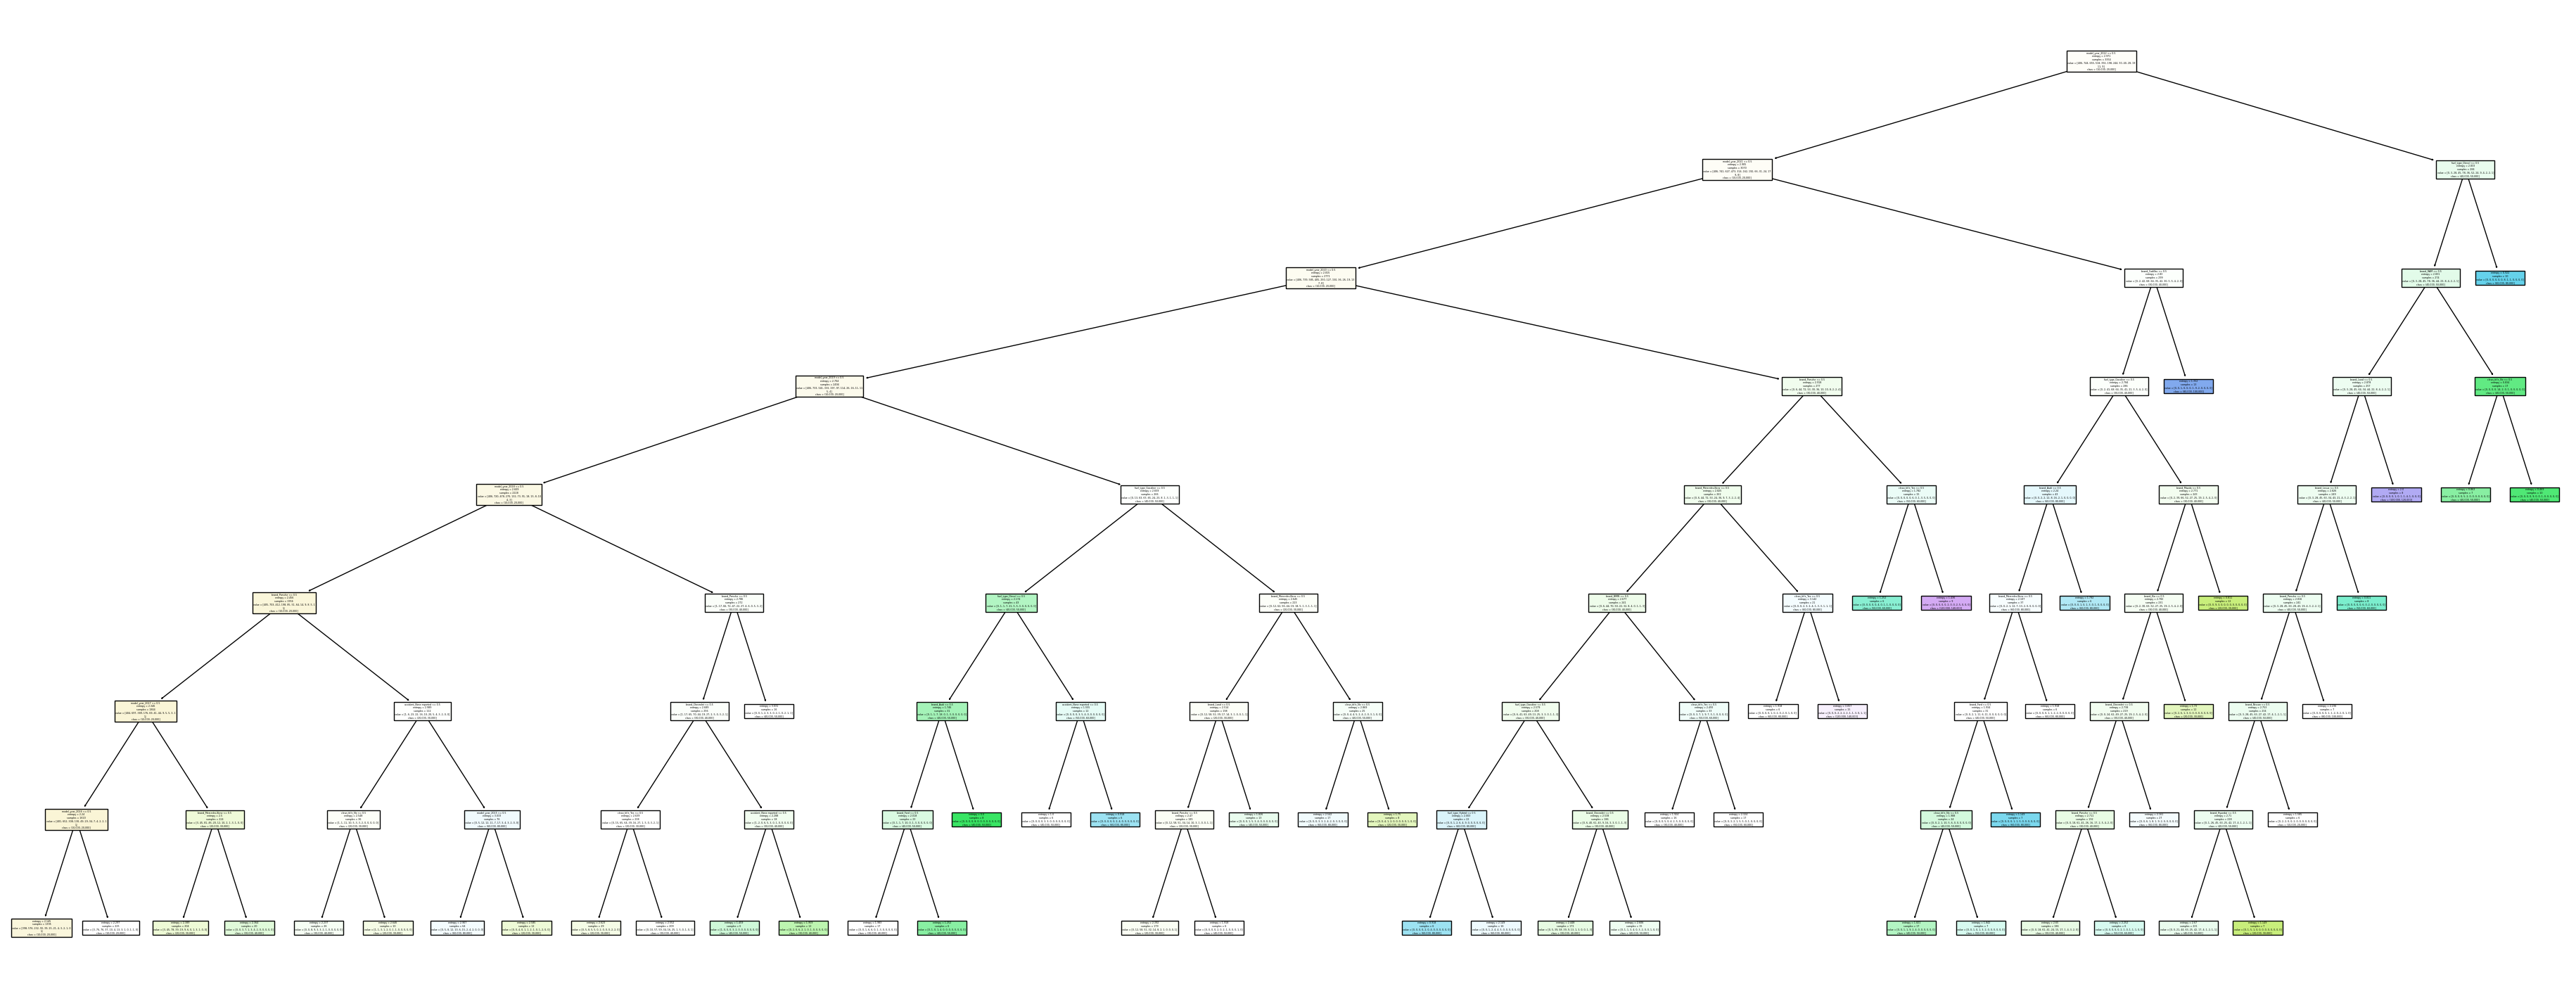

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

decisionTree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=8, min_samples_leaf=6, random_state=42)
decisionTree.fit(X_train,Y_train)

plt.figure(figsize=(47,18))
class_names= ["[1,800, 10,000]","(10,000, 20,000]","(20,000, 30,000]","(30,000, 40,000]","(40,000, 50,000]","(50,000, 60,000]","(60,000, 80,000]","(80,000, 100,000]","(100,000, 120,000]","(120,000, 140,000]","(140,000, 160,000]","(160,000, 180,000]","(180,000, 220,000]"]
_ = tree.plot_tree(decisionTree, feature_names = feature_names, filled = True, class_names = class_names)

# plt.savefig('tree_high_dpi',dpi=200)

**Answer:** 

*The Frist attribute to split on is model_year.*

What price range does your tree suggest for the following cars:

- Porsche, 2004, Gasoline, none accident, and clean title
- Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title

**[2 points]**

**Answer**:

* - Brand(Porsche):40; model_year(2004):8; accident(none reported):1; clean_tile(Yes):1--------price range:(20000,30000]
- Brand(Mercedes-Benz):34; model_year(2017):21; accident(unknown):2; clean_tile(Yes):1-------price range:(30000,40000] *

### (iv) Price prediction

Finally, use the decision tree to predict the price of W.'s car. What is the predicted price? Derive the value from the visualized tree manually (do not use the model's `predict` method). Provide the mean, not the bin.

**[1 point]**

**Answer**: 

*![tree_high_dpi_manual](./tree_high_dpi_manual.png)
The predicted price is 35000.*

## (c) Prediction by clustering **[21 points]**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statistics

In [33]:
# Import dataset
df = pd.read_csv("used_cars_preprocessed.csv")

You come up with another idea to give W. an estimate on his car price. You want to use clustering to find similar cars and use their average price as an estimate.

In this task you use DBSCAN to determine clusters of similar cars. For each cluster, you calculate the mean price as a representative. To predict the price for new cars, you assign it to an existing cluster and give the mean price as prediction.

### (i) Data transformation for clustering 

Use *brand*, *milage*, *fuel_type*, *accident*, *clean_title* and *horse_power* as descriptive features and *price* as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

**[1 point]**

In [34]:
X = df[['brand', 'milage', 'fuel_type', 'clean_title','horsepower']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)

### (ii) Computing the distance matrix

DBSCAN determines clusters based on the distance between different data points. Since some of the features you want to use are not numeric, you have to apply some encoding first to be able to use distance measures. 

For categorical variables, apply ordinal encoding and compute the Hamming distance; for numerical variables, apply standard scaling and compute the Euclidean distance.

For the total distance, first, weight the distance of categorical features by the fraction of categorical variables among the complete feature set. Then, add the distance of numerical features weighted by 1 over the total number of features used.

In other words: Let $x=(x_{cat},x_{num})^T$ and $y=(y_{cat},y_{num})^T$ be two samples where $x_{cat}$ and $y_{cat}$ represent their categorical features, and $x_{num}$ and $y_{num}$ represent their numerical features. Let $n_{cat}$ be the number of categorical features and $n_{num}$ be the number of numerical features. Then, the total distance $d_{tot}(x,y)$ between $x$ and $y$ is given by

$d_{tot}(x,y)=\dfrac{n_{cat}\cdot\Delta(x_{cat},y_{cat})+d(x_{num},y_{num})}{n_{cat}+n_{num}}$

where $\Delta$ is the Hamming distance and $d$ is the Euclidean distance.

Provide a matrix of the computed pairwise total distance between all cars in the training set. Keep the same indexing as in the training set.

**[4 points]**

*Hint*: Use the preprocessing module of sklearn to prepare your dataset for clustering.

*Background*: The Hamming distance is already normed on the number of features used and therefore returns a value between 0 and 1 independent from the number of variables.

In [35]:
preprocessor = make_column_transformer(
        (StandardScaler(), make_column_selector(dtype_include=np.number)),
        (OrdinalEncoder(), make_column_selector(dtype_include=object)),
)

X_transformed = preprocessor.fit_transform(X_train)

df = pd.DataFrame(X_transformed)
X_transformed_numeric = df.iloc[:, :2]
X_transformed_categorical = df.iloc[:, 2:5]
dist = DistanceMetric.get_metric('euclidean')
numeric_distances = dist.pairwise(X_transformed_numeric)
dist = DistanceMetric.get_metric('hamming')
categorical_distances = dist.pairwise(X_transformed_categorical)
categorical_columns = 3
numerical_columns = 2
total_features = categorical_columns + numerical_columns
fraction_categorical = categorical_columns / total_features
total_distances= (categorical_distances * fraction_categorical) + (numeric_distances * (1 / total_features))

print(total_distances)

[[0.         0.59411265 0.54301384 ... 0.46851882 0.53780879 0.30727476]
 [0.59411265 0.         0.59545662 ... 0.46907847 0.25780672 0.51010991]
 [0.54301384 0.59545662 0.         ... 0.33572113 0.55269619 0.45725282]
 ...
 [0.46851882 0.46907847 0.33572113 ... 0.         0.42134512 0.36372555]
 [0.53780879 0.25780672 0.55269619 ... 0.42134512 0.         0.45231759]
 [0.30727476 0.51010991 0.45725282 ... 0.36372555 0.45231759 0.        ]]


**Note**: From here on, instead of the distance matrix computed before, use the one provided in `distance.txt`.

In [36]:
# load the new distance matrix
dist = np.genfromtxt("distance.txt", delimiter=",")

### (iii) Applying DBSCAN

According to a common heuristic, set the minPts parameter of DBSCAN to twice the number of features. Show the according k-distance plot (where *k = minPts - 1*).

**[1 point]**

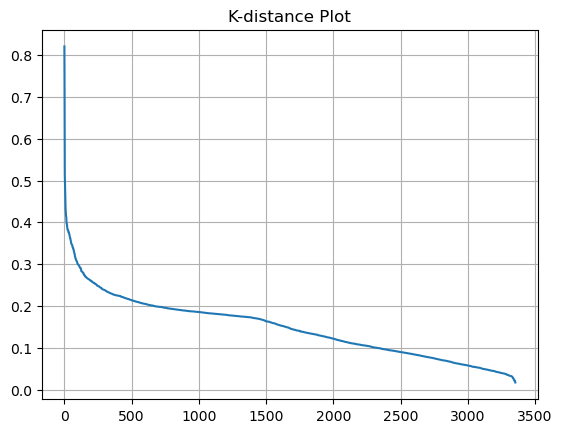

In [37]:
k = 9
k_dist = []

for i in range(0, dist.shape[0]):
    dist[i].sort()
    k_dist.append(dist[i][k])
k_dist.sort()

plt.plot(np.arange(dist.shape[0]),k_dist[::-1])
plt.title('K-distance Plot')
plt.grid(True)
plt.show()

Now you have to determine values for the *epsilon* parameter. Based on the previous plot, perform DBSCAN where you vary *epsilon* in the interval (0.0, 0.2] by steps of 0.01.

Draw a diagram with the parameter *epsilon* (between 0.01 and 0.2) on the x-axis and the percentage of 
- clustered samples,
- samples in the largest component,
- and noise

on the y-axis.

In a second diagram, plot the number of clusters over *epsilon*.

Based on these diagrams, which value for *epsilon* seems to be most suitable? Explain your answer. 

**[4 points]**

In [38]:
dist = np.genfromtxt("distance.txt", delimiter=",")

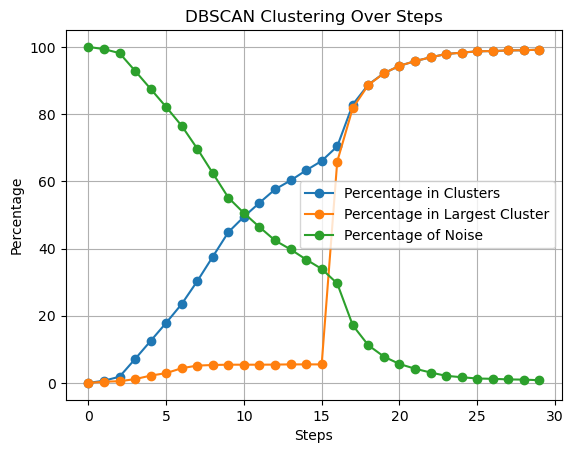

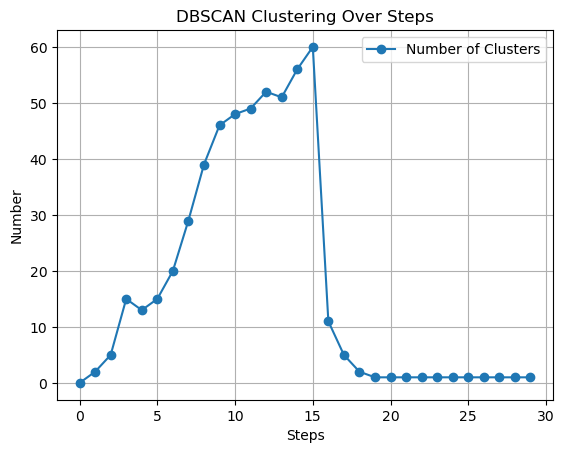

In [39]:
n_steps = 30
eps = 0.01
percentage_cluster = []
percentage_largest_cluster = []
percentage_noise = []
number_clusters = []
n_dist_rows = len(dist)

for i in range(0,n_steps):
    dbscan = DBSCAN(eps=eps, min_samples=10, metric='precomputed').fit(dist)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    number_clusters.append(n_clusters)
    percentage_cluster.append(np.round((n_dist_rows - n_noise) / n_dist_rows * 100 ,3))
    if n_clusters != 0:
        cluster_sizes = np.bincount(labels[labels != -1])
        n_largest_cluster = np.max(cluster_sizes)
        percentage_largest_cluster.append(np.round(n_largest_cluster/ n_dist_rows * 100 ,3))
    else:
        percentage_largest_cluster.append(0)
    percentage_noise.append(np.round((n_noise / n_dist_rows) * 100, 3))
    eps = eps + 0.01


plt.plot(percentage_cluster, label='Percentage in Clusters', marker='o')
plt.plot(percentage_largest_cluster, label='Percentage in Largest Cluster', marker='o')
plt.plot(percentage_noise, label='Percentage of Noise', marker='o')
plt.xlabel('Steps')
plt.ylabel('Percentage')
plt.title('DBSCAN Clustering Over Steps')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(number_clusters, label='Number of Clusters', marker='o')
plt.xlabel('Steps')
plt.ylabel('Number')
plt.title('DBSCAN Clustering Over Steps')
plt.legend()
plt.grid(True)
plt.show()

**Answer**: 

*Your answer here*

**Note**: No matter the conclusion made in the previous task, from now on, use the clustering model with *epsilon = 1/6* for predicting the price of W.'s car and evaluating the clustering technique.

Apply DBSCAN clustering to your training set based on the provided distance matrix. Answer the following questions:
- How many clusters are identified?
- What is their average size?
- What is the size of the largest cluster (absolute and relative)?
- How large is the percentage of unclustered samples (noise)?

**[4 points]**

In [40]:
dbscan = DBSCAN(eps=1/6, min_samples=10, metric='precomputed').fit(dist)
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_dist_rows = len(dist)
n_noise = list(labels).count(-1)
average_size = int(np.round(np.mean((n_dist_rows - n_noise) / n_clusters)))

cluster_sizes = np.bincount(labels[labels != -1])
n_largest_cluster = np.max(cluster_sizes)
n_largest_cluster_relative = np.round(n_largest_cluster / n_dist_rows * 100 ,3)

percentage = np.round((n_noise / n_dist_rows) * 100, 3)

print(f"Number of clusters: {n_clusters}")
print(f"Average size of clusters: {average_size}")
print(f"Size of the largest cluster(absolute): {n_largest_cluster}")
print(f"Size of the largest cluster(relative): {n_largest_cluster_relative}%")
print(f"Percentage of unclustered samples: {percentage}%")

Number of clusters: 52
Average size of clusters: 44
Size of the largest cluster(absolute): 338
Size of the largest cluster(relative): 10.078%
Percentage of unclustered samples: 31.962%


### (iv) Price prediction

Create a dataframe based on the training set where you assign each to each car the label of its corresponding cluster. Then, for each of the obtained clusters, compute their average price as an estimate. 

**[2 point]**

In [41]:
df = pd.DataFrame(X_train)
df['Cluster_Labels'] = labels
df['price'] = y_train
price_mean = df.groupby('Cluster_Labels')['price'].mean()
print(price_mean)

Cluster_Labels
-1     33448.434701
 0     36897.918367
 1     35729.360424
 2     44208.810651
 3     30018.549296
 4     45580.918239
 5     33833.294118
 6     30460.666667
 7     27237.035294
 8     25525.909091
 9     42265.266667
 10    66614.548387
 11    23895.806452
 12    93120.142857
 13    35596.833333
 14    17606.600000
 15    32197.420290
 16    20857.904762
 17    59543.375000
 18    44504.517241
 19    14132.750000
 20    30370.777778
 21    24597.193548
 22    21199.386364
 23    21398.500000
 24    57098.000000
 25    22763.261905
 26    31326.611111
 27    20487.400000
 28    57352.791667
 29    41773.300000
 30    51632.133333
 31    49145.562500
 32    13597.923077
 33    18122.379310
 34    20445.600000
 35    41238.777778
 36    28256.840000
 37    19139.812500
 38    22524.214286
 39    22877.857143
 40    83038.785714
 41    49283.888889
 42    24576.846154
 43    39290.909091
 44    28646.153846
 45    79399.400000
 46    22090.529412
 47    39458.800000
 48  

Use your test set to evaluate your prediction. Therefore, estimate the price of each car in the test set based on an appropriate corresponding cluster. 

*Hint*: To do that, determine the labels of neighboring cars and assign a label to  each car of the test set as if it were a point still to cluster by DBSCAN. 

Based on the previously computed average price of each cluster and your function, give a price estimate for each car in the test set.

Compare your estimates with the true prices. What are the values of the mean absolute error and the root-mean-square error? 

**[4 points]**

*Note*: The distance matrix between test and training set is provided in `distance_test_to_train.txt`.

In [42]:
test_dist = np.genfromtxt("distance_test_to_train.txt", delimiter=",")

In [43]:
estimated_prices = []

for smallest_dist in test_dist:
    nearest_neighbor = np.argmin(smallest_dist)
    test_labels = df.iloc[nearest_neighbor]['Cluster_Labels']
    estimated_prices.append(price_mean[test_labels])

mae = mean_absolute_error(y_test, estimated_prices)
mse = mean_squared_error(y_test, estimated_prices)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 19890.40930745445
Root Mean Squared Error (RMSE): 29860.47986148254


In [44]:
mean_prices_no_outliers = []
estimated_prices = []

grouped = df.groupby('Cluster_Labels')['price']
for cluster_label, prices in grouped:
    prices_list = list(prices)
    Q1 = np.percentile(prices_list, 25)
    Q3 = np.percentile(prices_list, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [price for price in prices_list if price < lower_bound or price > upper_bound]
    prices_no_outliers = [price for price in prices_list if price >= lower_bound and price <= upper_bound]
    mean_price_no_outliers = np.mean(prices_no_outliers)
    mean_prices_no_outliers.append(mean_price_no_outliers)

for smallest_dist in test_dist:
    nearest_neighbor = np.argmin(smallest_dist)
    test_labels = df.iloc[nearest_neighbor]['Cluster_Labels']
    if test_labels == -1 or test_labels == 1 or test_labels == 2:
        estimated_prices.append(df.iloc[nearest_neighbor]['price'])
    else:
        estimated_prices.append(mean_prices_no_outliers[test_labels+1])

mae = mean_absolute_error(y_test, estimated_prices)
mse = mean_squared_error(y_test, estimated_prices)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 12150.948181415513
Root Mean Squared Error (RMSE): 18370.56863676667


**Answer**:

*Your answer here*

Finally, to predict the price for the target car, find a cluster that contains cars with similar features. 

**Note**: The distance matrix between the target car and the training set is provided in `distance_car_to_train.txt`.

Show the cars within a distance of *epsilon* to W's car including all used features, their price and the label of their cluster.

Which cluster would you assign the target car to and what is the estimated price? Round to the second decimal. 

**[1 point]**

In [45]:
car_dist = np.genfromtxt("distance_car_to_train.txt", delimiter=",")

In [46]:
epsilon = 1/6
indices = []

for i, value in enumerate(car_dist):
    if value < epsilon:
        indices.append(i)

selected_df = df.iloc[indices]
selected_df.to_csv("selected_rows.csv", index=False)

estimated_prices = np.round((price_mean[test_labels]), 2)

display(selected_df)
print("Estimated Price:", estimated_prices)

brand  milage fuel_type clean_title  horsepower  Cluster_Labels  price
1930  Porsche   42635  Gasoline         Yes       355.0               2  72995
883   Porsche   48900  Gasoline         Yes       350.0               2  62500
1483  Porsche  126000  Gasoline         Yes       400.0               2  17999
1721  Porsche   60000  Gasoline         Yes       310.0               2  45000
2988  Porsche   64600  Gasoline         Yes       440.0               2  41000
1940  Porsche   72329  Gasoline         Yes       340.0               2  29500
1847  Porsche  124000  Gasoline         Yes       420.0               2  25000
3523  Porsche   43500  Gasoline         Yes       350.0               2  66500
3187  Porsche   50500  Gasoline         Yes       355.0               2  56000
1088  Porsche  135606  Gasoline         Yes       405.0               2  15000
41    Porsche   73043  Gasoline         Yes       300.0               2  30990
3021  Porsche   92500  Gasoline         Yes       450.0               2  12000
2477  Porsche   42526  Gasoline         Yes       440.0               2  66200
2194  Porsche   50000  Gasoline         Yes       340.0               2  36000
2697  Porsche   70455  Gasoline         Yes       300.0               2  45855
62    Porsche   59338  Gasoline         Yes       335.0               2  42499
1028  Porsche   78000  Gasoline         Yes       350.0               2  68000
764   Porsche   92000  Gasoline         Yes       400.0               2  23000
1775  Porsche   76200  Gasoline         Yes       420.0               2  42000
3506  Porsche   36000  Gasoline         Yes       400.0               2  84999
2657  Porsche   80300  Gasoline         Yes       340.0               2  23999
2338  Porsche  104000  Gasoline         Yes       355.0               2  44800
3176  Porsche   80000  Gasoline         Yes       355.0               2  43000
1991  Porsche   61600  Gasoline         Yes       345.0               2  51750
45    Porsche   39000  Gasoline         Yes       400.0               2  73000
2998  Porsche   36670  Gasoline         Yes       400.0               2  82499
2696  Porsche   54000  Gasoline         Yes       330.0               2  75000
3153  Porsche   73500  Gasoline         Yes       480.0               2  75499
1012  Porsche   39500  Gasoline         Yes       440.0               2  52590
723   Porsche   62743  Gasoline         Yes       400.0               2  28600
2465  Porsche   46000  Gasoline         Yes       400.0               2  38000
1822  Porsche   42596  Gasoline         Yes       440.0               2  78000
3366  Porsche   56985  Gasoline         Yes       400.0               2  65900
1712  Porsche   36000  Gasoline         Yes       400.0               2  37000

Estimated Price: 18122.38


**Answer**: 

*Your answer here*

## (d) Prediction by regression and with neural networks **[17 points]**

In this task, we build regression models and neural networks to predict the car prices.

Use the dataset *used_cars_preprocessed.csv* for this subtask as well as the next.

In [73]:
df = pd.read_csv("used_cars_preprocessed.csv")

### (i) Feature engineering

Run the code below that derives a feature *average_model_price* and adds it to the entries in the dataset and to the target car.

Do you expect that using this feature as a descriptive feature will be beneficial for the quality of price prediction models? Discuss possible advantages and disadvantages. 

**[2 points]**

*Hint:* You can also first play around with different feature selections in the model training tasks below below to get a feeling for the usefulness of features.

In [74]:
average_model_prices = {
    model: df[df["model"] == model]["price"].mean()
    for model in set(df["model"].values)
}

df["average_model_price"] = df.apply(lambda row: average_model_prices[row["model"]], axis = 1)
car["average_model_price"] = car.apply(lambda row: average_model_prices[row["model"]], axis = 1)

**Answer:**

*Your answer here*

### (ii) Feature selection

As descriptive features for the models trained in the following, use as categorical feature *accident* and as numerical features *model_year* and *milage*. Depending on your answer for task (i), make a choice whether to include or not to include *average_model_price*.

Beside these features, choose one of the three numerical features *horsepower*, *cylinders* and *litres* as another descriptive feature. Motivate your choice with the help of appropriate visualization techniques. 

**[1 point]**

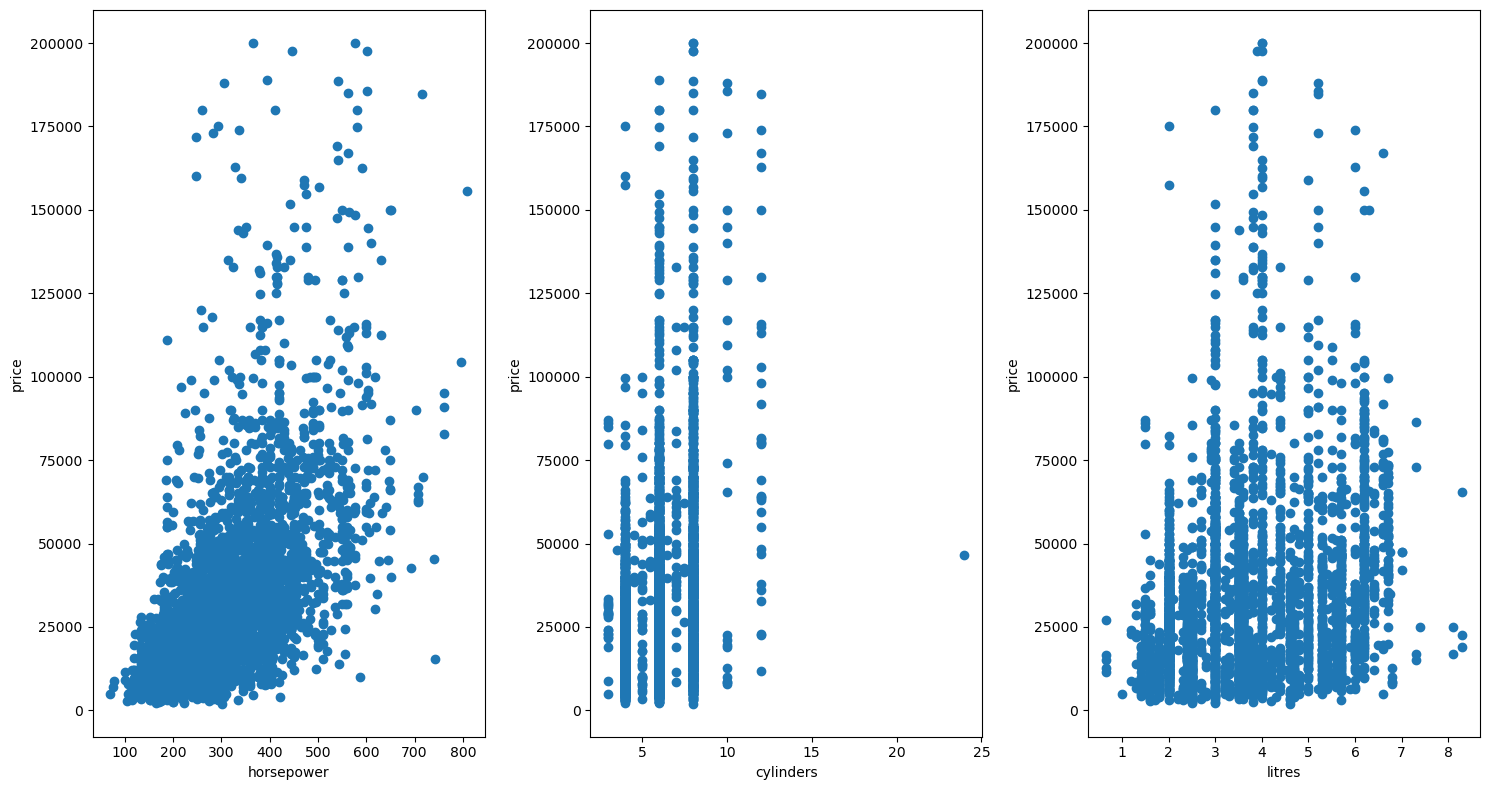

In [75]:
import matplotlib.pyplot as plt

x1 = df["horsepower"]
x2 = df["cylinders"]
x3 = df["litres"]
y = df["price"]

plt.figure(figsize=(15, 8))
plt.subplot(1,3,1)
plt.scatter(x1,y)
plt.xlabel("horsepower")
plt.ylabel("price")
plt.subplot(1,3,2)
plt.scatter(x2,y)
plt.xlabel("cylinders")
plt.ylabel("price")
plt.subplot(1,3,3)
plt.scatter(x3,y)
plt.xlabel("litres")
plt.ylabel("price")
plt.tight_layout()
plt.show()

**Answer**

*Your answer here*

### (iii) Data transformation for regression and neural networks

Use *accident*, *model_year* and *milage* as well as your selection from the previous task as descriptive features and *price* as the target feature. Create a test and training set like before, encoding the categorical feature. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets as well as the target car. Use the `StandardScaler` from *sklearn* for normalization.

*Hint:* Append the target car to the dataset during the encoding procedure.

**[2 points]**


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_data = df[["accident", "model_year", "milage", "horsepower"]].copy()
dataset_data['accident'] = dataset_data['accident'].map({'At least 1 accident or damage reported': 0, 'None reported': 1, 'Unknown': 2})
dataset_target = df[["price"]]

X_train, X_test,y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.05, random_state=3)

scaler = StandardScaler()
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In the following, we will train and evaluate various models for price prediction using the *sklearn* library. To leverage the shared interface for models in the sklearn library, it is convenient to create a function for the model training and evaluation.

### (iv) Model training function

Implement the body of the function *model_training* below. The function should adhere to the following specification:

#### Input:
- **model**: A model (e.g., Linear Regression or Neural Network) of the sklearn library.
- **x_training_data**: The descriptive data to train the model.
- **y_training_data**: The corresponding values of target feature of the training data.
- **x_test_data**: The descriptive data to test the model.
- **y_test_data**: The corresponding values of target feature of the test data.
- **grid_params**: Model parameters for a grid search.

#### Output:
- **grid**: An object of the class sklearn.model_selection.GridSearchCV that was fitted against the training data. The training should follow a 5-fold cross-validation.
- **mean_abs_err**: The mean absolute error of the trained model on the passed test data.
- **rms_err**: The root-mean-square error of the trained model on the passed test data.
- **best_params**: The optimal parameter configuration, i.e., the parameters of the best scoring model that was selected by the grid search.

**[2 points]**

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_training(model, x_training_data, y_training_data, x_test_data, y_test_data, grid_params):
    grid = None
    best_params = None
    mean_abs_err = None

    grid = GridSearchCV(model, grid_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
    grid.fit(x_training_data, y_training_data)
    best_params = grid.best_params_
    y_pred = grid.predict(x_test_data)
    mean_abs_err = mean_absolute_error(y_test_data, y_pred)
    rms_err = np.sqrt(mean_squared_error(y_test_data, y_pred))

    return grid, mean_abs_err, rms_err, best_params

### (v) Linear regression

Apply your function *model_training* to train a linear regressor. Show the errors (MAE, RMSE) and predict the price of the target car. 

**[1 point]**


In [85]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
grid_params = {'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]}
grid, mean_abs_err, rms_err, best_params = model_training(linear_model, normalized_x_train, y_train, normalized_x_test, y_test, grid_params)

car_data = car[["accident", "model_year", "milage", "horsepower"]].copy()
car_data['accident'] = car_data['accident'].map({'None reported': 1})

normalized_car = scaler.transform(car_data)
predicted_price = grid.predict(normalized_car)

print('Mean Absolute Error:', mean_abs_err)
print('Root Mean Squared Error:', rms_err)
print('Best Parameters:', best_params)
print('Predicted Price:', predicted_price)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-416584242.400 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-386910622.086 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-400424563.678 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-451906519.977 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-471528948.147 total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-366451806.374 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-332606380.150 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-365937972.669 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept

[CV 4/5] END copy_X=True, fit_intercept=False, n_jobs=3, positive=False;, score=-1606483040.610 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, n_jobs=3, positive=False;, score=-1755382638.801 total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=True;, score=-416584242.400 total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=True;, score=-386910622.086 total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=True;, score=-400424563.678 total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=True;, score=-451906519.977 total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=True;, score=-471528948.147 total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=False;, score=-366451806.374 total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=True, n_jobs=1, positive=False;, score=-332606380.

Learning linear relationships only provides limited performance. Therefore, we will analyze non-linear relationships.

### (vi) Regression with non-linear kernels

Plot the _milage_ feature (x-Axis) in the data against the _price_ feature (y-Axis). 

Based on the curve, what kernel functions could be used to transform the milage feature? Suggest at least two possible kernel functions. 


**[2 points]**

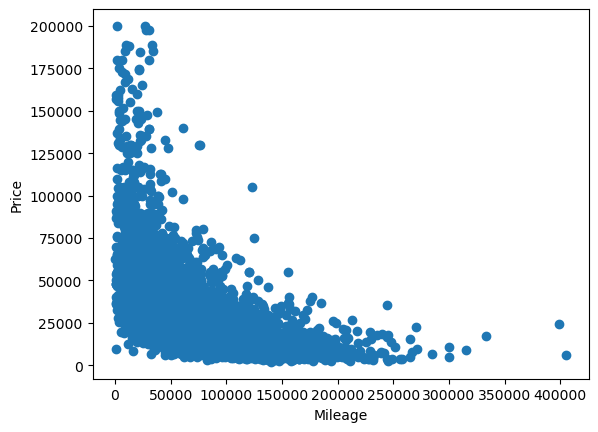

In [ ]:
x = df["milage"]
y = df["price"]
plt.scatter(x,y)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

**Answer:**

*Your answer here*

For each kernel function, create a copies of your normalized train sets, test sets and the normalized target car, and extend them with the transformed *milage* feature. Call the _model_training_ function with a linear regression model. Show the errors (MAE, RMSE) and predict the price of the target car. Which of the kernels performs best?

**[3 points]**

In [87]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train[["accident", "model_year", "horsepower"]].copy())
X_scaled_test = scaler.transform(X_test[["accident", "model_year", "horsepower"]].copy())

#Radial Basis Function (RBF) Kernel: 
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler()
X_scaled_train_rbf = rbf_feature.fit_transform(X_train[["milage"]]).copy()  
X_scaled_test_rbf = rbf_feature.transform(X_test[["milage"]].copy())
X_normalized_train_rbf = np.concatenate([X_scaled_train, X_scaled_train_rbf], axis=1)
X_normalized_test_rbf = np.concatenate([X_scaled_test, X_scaled_test_rbf], axis=1)

grid, mean_abs_err_rbf, rms_err_rbf, best_params_rbf = model_training(linear_model, X_normalized_train_rbf, y_train, X_normalized_test_rbf, y_test, grid_params)

car_data = car[["accident", "model_year", "milage", "horsepower"]].copy()
car_data['accident'] = car_data['accident'].map({'None reported': 1})
car_data_scaled = scaler.transform(car_data[["accident", "model_year", "horsepower"]])
car_data_rbf = rbf_feature.transform(car_data[["milage"]])
car_data_normalized_rbf = np.concatenate([car_data_scaled, car_data_rbf], axis=1)
predicted_price_rbf = grid.predict(car_data_normalized_rbf)

print('with Radial Basis Function (RBF) Kernel')
print('Mean Absolute Error:', mean_abs_err_rbf)
print('Root Mean Squared Error:', rms_err_rbf)
print('Best Parameters:', best_params_rbf)
print('Predicted Price:', predicted_price_rbf)

#Polynomial Kernel:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
X_scaled_train_poly = poly.fit_transform(X_train[["milage"]].copy())  
X_scaled_test_poly = poly.transform(X_test[["milage"]].copy())
X_normalized_train_poly = np.concatenate([X_scaled_train, X_scaled_train_poly], axis=1)
X_normalized_test_poly = np.concatenate([X_scaled_test, X_scaled_test_poly], axis=1)

grid, mean_abs_err_poly, rms_err_poly, best_params_poly = model_training(linear_model, X_normalized_train_poly, y_train, X_normalized_test_poly, y_test, grid_params)

car_data = car[["accident", "model_year", "milage", "horsepower"]].copy()
car_data['accident'] = car_data['accident'].map({'None reported': 1})
car_data_scaled = scaler.transform(car_data[["accident", "model_year", "horsepower"]])
car_data_poly = poly.transform(car_data[["milage"]])
car_data_normalized_poly = np.concatenate([car_data_scaled, car_data_poly], axis=1)
predicted_price_poly = grid.predict(car_data_normalized_poly)

print('with Polynomial Kernel')
print('Mean Absolute Error:', mean_abs_err_poly)
print('Root Mean Squared Error:', rms_err_poly)
print('Best Parameters:', best_params_poly)
print('Predicted Price:', predicted_price_poly)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-430306448.699 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-408559234.644 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-403207445.407 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-462826935.625 total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True;, score=-481477913.276 total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-442108419.808 total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-410902764.354 total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False;, score=-404306748.952 total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept

**Answer:**

*Your answer here*

### (vii) Neural networks

While you are working on your predictive models, N. walks by. With a critical look on your screen, N. says: "Linear regression is so boring. Nowadays, deep learning is all the rage. Ever heard of ChatGPT and transformer models? Come on, at least you should train a neural network. Watch me, I'll show you," N. says, grabs your keyboard and starts typing.

In [88]:
### Provided Code (do not change!)
from sklearn.neural_network import MLPRegressor

param_grid_nn = {'activation': ['identity'],
              "early_stopping": [True],
              "validation_fraction": [0.1],
              "learning_rate": ["adaptive"],
              'solver' : ['lbfgs'],
              'hidden_layer_sizes': [(2,1), (5,1), (20,1), (100,5)]
             }
grid_nn, mean_abs_err_nn, rms_err_nn, best_params_nn = model_training(
    MLPRegressor(max_iter = 10000), normalized_x_train, y_train, normalized_x_test, y_test, param_grid_nn
)
print("Mean absolute error: {}".format(mean_abs_err_nn))
print("Root-mean-square error: {}".format(rms_err_nn))
print("Predicted Price of the target car: {}".format(grid_nn.predict(normalized_car)))
print("Params of best model: {}".format(best_params_nn))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END activation=identity, early_stopping=True, hidden_layer_sizes=(2, 1), learning_rate=adaptive, solver=lbfgs, validation_fraction=0.1;, score=-366450776.499 total time=   0.0s
[CV 2/5] END activation=identity, early_stopping=True, hidden_layer_sizes=(2, 1), learning_rate=adaptive, solver=lbfgs, validation_fraction=0.1;, score=-332606670.865 total time=   0.0s
[CV 3/5] END activation=identity, early_stopping=True, hidden_layer_sizes=(2, 1), learning_rate=adaptive, solver=lbfgs, validation_fraction=0.1;, score=-365937870.805 total time=   0.0s
[CV 4/5] END activation=identity, early_stopping=True, hidden_layer_sizes=(2, 1), learning_rate=adaptive, solver=lbfgs, validation_fraction=0.1;, score=-400961795.561 total time=   0.0s
[CV 5/5] END activation=identity, early_stopping=True, hidden_layer_sizes=(2, 1), learning_rate=adaptive, solver=lbfgs, validation_fraction=0.1;, score=-427642961.291 total time=   0.0s
[CV 1/5] E

Execute the code above and interpret the result in comparison to your previous results. In particular, discuss the choice of the activation function and the size of the hidden layers.

*Hint:* Set the verbose parameter of the grid search (e.g. , to 3) to get more detailed information on the model training.

**[4 points]**

**Answer:**

*Your answer here*

## (e) Discussion **[6 points]**

Summarize your findings and discuss limitations of the different prediction approaches. In your discussion, not only refer to the predicted price of the running example and the confidence of your prediction, but also to the methods in general.

- Based on the general methodologies, which approach would you prefer and why?
- Which approach performed best on the given example?
- Are your results consistent with this view?
- How would you explain the margin of errors in each approach?
- What can you deduce from the differences between MAE and RMSE?
- Are there limitations regarding the comparability of the approaches?

  
**[6 points]**

**Answer:**

*Your answer here*

Having completed your extensive work on predicting prices, you give W. a call to report your findings. W. is excited to hear about your results, and promises to consider your suggestions. 


# Q4: Predicting time-to-sale **[16 points]**

**ReDrive** has just rented a small area parking area in front of the facility with unused space for ten cars. Your new project is an exhibition of selected cars on that space. For a one-time commission, sellers can drive up their car there and your company will market the car also locally.

To maximize turnover by commissions, your business strategy is to exhibit cars there that are likely to be resold quickly. You decide that the cars on display should have an expected selling time of at most 30 days.

## (a) Data preparation **[4 points]**

In this task, we use the dataset **used_cars_reselling_states.csv**. This is an extension of the working dataframe used so far, also describing when a car has been registered for reselling (*registration_date*), when it was successfully resold (*reselling_date*), and the number of days from registration to reselling (*reselling_time*).

Run the code below. The code loads the dataframe, filters out instances without a well-defined outcome for our classification problem, and applies oversampling to the dataframe to circumvent a class imbalance problem.

In [ ]:
### Provided Code (do not change!)
import pandas as pd
df = pd.read_csv("used_cars_reselling_states.csv")
df.dropna(subset=["reselling_date"], inplace=True)

# Oversample to circumvent class imbalance 
df_fast = df[df['reselling_time'] <= 30]
df_notfast = df[df['reselling_time'] > 30]
sample_size = len(df_notfast) - len(df_fast)
random_sample = df_fast.sample(n=sample_size, replace=True)
df = pd.concat([df, random_sample], ignore_index=True)

### (i) Target feature creation

Use the column *reselling_time* to define a binary categorical (boolean) feature according to the description above and append this feature to the dataframe. 

**[1 point]**

In [ ]:
df['fast_resell'] = df['reselling_time'] <= 30
df['fast_resell'] = df['fast_resell'].astype(int)

### (ii) Sensitivity and Specificity

You have learned about various quality metrics for classifiers.

Briefly illustrate the terms *sensitivity* and *specificity* in the context of the classification problem of fast reselling cars. Suggest which of these metrics is more important for the classifier and provide a justified reason for your suggestion. 

**[2 points]**

**Answer:**

*Your answer here*


### (iii) Data transformation for classification problem

Use *milage*, *model_year* and *price* as descriptive features and your binary feature as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets. Use the `StandardScaler` from *sklearn* for normalization.

**[1 point]**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dataset_data = df[["model_year", "milage", "price"]].copy()
dataset_target = df[["fast_resell"]]

X_train, X_test,y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.05, random_state=3)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## (b) Classifiers **[10 points]**

### (i) Model training

Train two classifiers: 
- A Logistic Regressor,
- A Support Vector Machine.

 **[1 point]**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logistic_model = LogisticRegression().fit(X_train_normalized, y_train)

svm_model = SVC().fit(X_train_normalized, y_train)

### (ii) Evaluation, Part 1

For both classifiers, show the confusion matrix. 

**[2 points]**

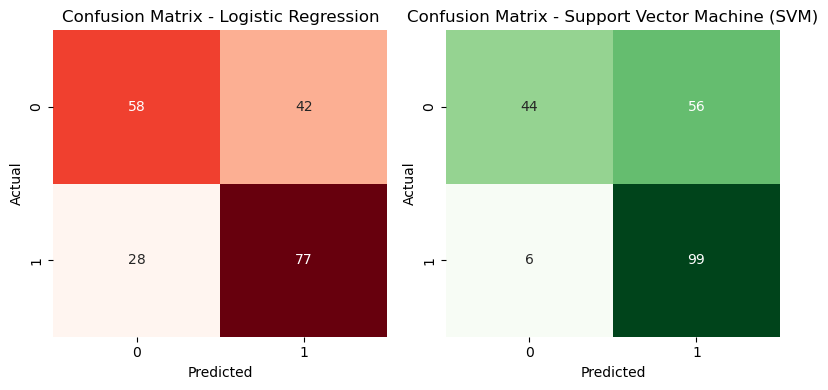

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_logistic = logistic_model.predict(X_test_normalized)
y_pred_svm = svm_model.predict(X_test_normalized)

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Compute, if possible, precision, recall and F1-score of each classifier. Also, compute sensitivity and specificity of each classifier.

**[2 points]**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

tn_logistic, fp_logistic, fn_logistic, tp_logistic = cm_logistic.ravel()
sensitivity_logistic = tp_logistic / (tp_logistic + fn_logistic)
specificity_logistic = tn_logistic / (tn_logistic + fp_logistic)

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

print("Logistic Regression:")
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("Sensitivity:", sensitivity_logistic)
print("Specificity:", specificity_logistic)
print("SVM:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)

Logistic Regression:
Precision: 0.6470588235294118
Recall: 0.7333333333333333
F1-score: 0.6875
Sensitivity: 0.7333333333333333
Specificity: 0.58
SVM:
Precision: 0.6387096774193548
Recall: 0.9428571428571428
F1-score: 0.7615384615384615
Sensitivity: 0.9428571428571428
Specificity: 0.44


Would you choose any of the trained classifiers for application on the described problem? If yes, which one? Justify your answer.

**[1 point]**

**Answer:**

*Your answer here*

### (iii) Evaluation, Part 2

Besides the *predict* method to decide for the class label of an instance, a `LogisticRegression` model from *sklearn* offers the method `predict_proba`. This method takes a list of instances to be classified and returns a list of tuples. Each tuple has two entries: The first entry is the probability for the respective instance to be classified as negative and the second entry is the probability for the instance to be classified as positive. Thus, the entries of each tuple sum up to 1.

As you learned in the lecture, we can vary the outcome of a logistic regression classifer by setting a threshold. Instances are labeled as positive if their probability for a positive label is greater than or equal to the threshold.

Define the body of the function *threshold_to_rates* below. This function receives a threshold between 0 and 1, and then classifies the test data based on the threshold and the outcome of the instances under the `predict_proba` method of your trained classifier. The function must return a tuple where the first entry is the true positive rate and the second entry is the false positive rate with respect to the given configuration.

**Input**:
- **h**: A real number within the interval $[0,1]$.

**Output**:
- **TPR**: The true positive rate of your test data set, based on the given threshold.
- **FPR**: The false positive rate of your test data set, based on the given threshold. 

**[3 points]**

In [ ]:
def threshold_to_rates(h):
    tpr = 0
    fpr = 0

    probabilities = logistic_model.predict_proba(X_test_normalized)[:, 1]
    predicted_labels = (probabilities >= h).astype(int)
    confusion_matrix_threshold = confusion_matrix(y_test, predicted_labels)

    tn, fp, fn, tp = confusion_matrix_threshold.ravel()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    return (tpr, fpr)

Having specified the *threshold_to_rates* function, execute the code box below to plot the ROC curve of your classifier.

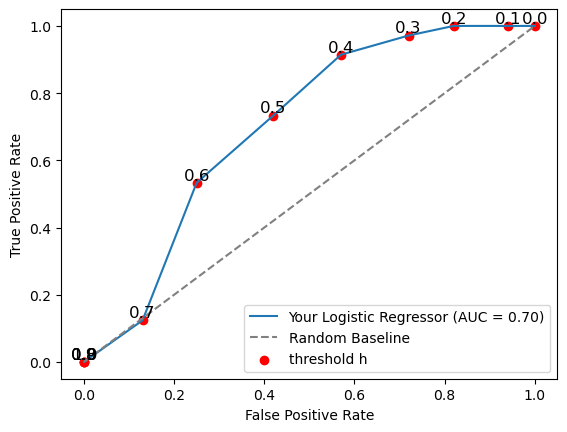

In [ ]:
# Given code (Do not change)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
steps =  np.arange(1.0, -0.1, -0.1)
steps = [round(h*10)/10 for h in steps]
data = {
    h : threshold_to_rates(h)
    for h in steps
}

fpr = [data[h][1] for h in steps]
tpr = [data[h][0] for h in steps]

roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Your Logistic Regressor')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Baseline')
plt.scatter(fpr, tpr, color='red', marker='o', label='threshold h')
for i, label in enumerate(steps):
    plt.text(fpr[i], tpr[i], label, fontsize=12, ha='center', va='bottom')

plt.legend()
plt.show()

Interpret the plot. Is there a threshold you would choose for the application of the classifier on the described problem? Justify your answer.

**[1 point]**

**Answer:**

*Your answer here*

## (c) Discussion **[2 points]**

Summarize your findings. Discuss limitations and improvement potentials. 

**[2 points]**

**Answer:**

*Your answer here*